## This script was developed for:
#### Zhu, F. and B.E.J. Rose. (2022). Multiple Equilibria in a Coupled Climate-Carbon Model. Journal of Climate. DOI: 10.1175/JCLI-D-21-0984.1

Author of the script: *Fangze Zhu*

University at Albany, State University of New York (SUNY)

In [1]:
from glob import glob
import os
import numpy as np
import xarray as xr
from netCDF4 import Dataset
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import matplotlib.cm as cm

mitdir = '/nfs/home11/grad/2017/fz172169/MITgcm/utils/python/MITgcmutils'
os.chdir(mitdir)
import MITgcmutils as mit

csdir = '/nfs/home11/grad/2017/fz172169/Documents/my_scripts'
os.chdir(csdir)
from cs import pcol

In [481]:
rundir = '/nfs/roselab_rit/mitgcm_run'
outdir = '/nfs/roselab_rit/mitgcm_output/global_fric'
datadir = '/nfs/roselab_rit/mitgcm_output/kernel_data'

grid_atm = mit.rdmnc(os.path.join(rundir,'radCO2_warm_pco2','out/Cpl1/GridAtm/grid.*'))   # Read the grid
grid_ocn = mit.rdmnc(os.path.join(rundir,'radCO2_warm_pco2','out/Cpl1/GridOcn/grid.*'))   # Read the grid
global_area = np.sum(grid_atm['rA'])
XG = grid_atm['XG']
YG = grid_atm['YG']

In [395]:
total_atmos_moles = 1.77E20
R_CP = 117.

In [475]:
#-- Multiple equilibria
exp_warm = ['radCO2_warm_pco2']
exp_cold = ['radCO2_pC200_SC338_cold']
exp_waterbelt = ['radCO2_waterbelt_pco2']
exp_equilibria = ['radCO2_warm_pco2','radCO2_pC200_SC338_cold','radCO2_waterbelt_pco2','radCO2_waterbelt_T247']

warm_list = ['radCO2_warm_T310',
             'radCO2_warm_T306.2',
             'radCO2_warm_T302.3',
             'radCO2_warm_T300',
             'radCO2_warm_T297.9',
             'radCO2_cold_T295.8', \
             'radCO2_cold_T295.6', \
             'radCO2_cold_T295.4', \
             'radCO2_cold_T295.3', \
             'radCO2_cold_T294.8', \
             'radCO2_cold_T294.5', \
             'radCO2_cold_T294.1', \
             'radCO2_cold_T293.7', \
             'radCO2_cold_T293.5', \
             'radCO2_cold_T293', \
             ]

cold_list = ['radCO2_waterbelt_T271.4', \
             'radCO2_cold_T271.7', \
             'radCO2_cold_T272',
             'radCO2_cold_T272.3',
             'radCO2_cold_T272.7',
             'radCO2_cold_T273',
             'radCO2_cold_T273.4',
             'radCO2_cold_T273.8', \
             'radCO2_cold_T283.4', \
             'radCO2_cold_T285.2', \
             'radCO2_cold_T286.5', \
             'radCO2_cold_T287.2', \
             'radCO2_cold_T288', \
             'radCO2_cold_T288.9', \
             'radCO2_cold_T289.7', \
             'radCO2_cold_T290.5', \
             'radCO2_cold_T291.2', \
             'radCO2_cold_T291.7', \
             'radCO2_cold_T292.1', \
             'radCO2_cold_T292.3', \
             ]

waterbelt_list = ['radCO2_waterbelt_T251.1',
                  'radCO2_waterbelt_T251.3',
                  'radCO2_waterbelt_T251.5',
                  'radCO2_waterbelt_T251.7',
                  'radCO2_waterbelt_T251.8',
                  'radCO2_waterbelt_T251.9', \
                  'radCO2_waterbelt_T262', \
                  'radCO2_waterbelt_T265', \
                  'radCO2_waterbelt_T266.6', \
                  'radCO2_waterbelt_T267.5', \
                  ]

snowball_list = ['radCO2_waterbelt_T243.6', \
                 'radCO2_waterbelt_T244.5', \
                 'radCO2_waterbelt_T247', \
                 'radCO2_waterbelt_T248.1', 
                 'radCO2_waterbelt_T248.7',
                 'radCO2_waterbelt_T249', \
                 'radCO2_waterbelt_T249.6', 
                 'radCO2_waterbelt_T249.9', \
                 'radCO2_waterbelt_T251']

forc_list = [#'radCO2_warm_pco2', \
#              'radCO2_warm_SC358', \
#              'radCO2_warm_SC357', \
             'radCO2_warm_SC356', \
#              'radCO2_warm_SC355', \
#              'radCO2_warm_SC354', \
#              'radCO2_warm_SC353', \
#              'radCO2_warm_SC352', \
#              'radCO2_warm_SC351', \
#              'radCO2_warm_SC350', \
             
             
             'radCO2_warm_SC336', \
             'radCO2_warm_SC335', \
#              'radCO2_warm_SC337', \
#              'radCO2_warm_SC334', \
#              'radCO2_warm_SC333', \
#              'radCO2_warm_SC332', \
#              'radCO2_warm_SC330', \
#              'radCO2_warm_SC328', \
#              'radCO2_warm_SC324', \
             'radCO2_cold_SC340', \
             'radCO2_cold_SC339', \
             'radCO2_cold_SC336', \
             'radCO2_cold_SC335', \
             #'radCO2_cold_SC334.5', \
             #'radCO2_cold_SC334.9', \
             #'radCO2_cold_SC334.8', \
             #'radCO2_cold_SC334.7', \
             #'radCO2_cold_SC334.6', \
             #'radCO2_cold_SC334', \
             #'radCO2_cold_SC341_old', \
             #'radCO2_cold_SC335_old', \
             #'radCO2_cold_SC334_old', \
#              'radCO2_waterbelt_SC350', \
             'radCO2_waterbelt_SC349', \
             'radCO2_waterbelt_SC348', \
             'radCO2_waterbelt_pco2', \
             'radCO2_waterbelt_SC337', \
             #'radCO2_waterbelt_SC336', \
             #'radCO2_waterbelt_SC335', \
             ]

In [295]:
import re
def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    '''
    alist.sort(key=natural_keys) sorts in human order
    '''
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]

In [306]:
def getEnergyBudget(path, fname=None, var=None):
    '''
    Calculate the global and annual mean TOA energy budget
    from MITgcm run directory.
    '''
    
    cpldir = 'out/Cpl*'
    subdir = 'Atm'
    filename = fname
    item_list = var
    

    aim_path = os.path.join(path,cpldir,subdir)
    aim_list = glob( aim_path )   # A list of all files matching aim_path (n = nperiods)
    aim_list.sort(key=natural_keys)
    
    print('Attempting to find all files matching ',os.path.join(aim_path,filename))
    print('Found ', len(aim_list), ' files.')
    for n in range(len(aim_list)):
        aim_list[n] = aim_list[n] + '/' + filename   # A list of all files matching aim_path + filename 
#     for l in aim_list:
#         print(l)                                                 # (n = nperiods * ntiles)
  
    EnergyBudget = {}
    for item in item_list:
        EnergyBudget[item] = np.zeros(len(aim_list))
    n=0
    for string in aim_list:
        #AIM = xr.open_mfdataset(string)
        AIM = mit.rdmnc(string, EnergyBudget.keys())
        for name in EnergyBudget.keys():
            AIM_VAR = AIM[name]
            annual_var = np.squeeze(np.mean(AIM_VAR,axis=0))    #  take the annual mean
            global_var = np.sum(annual_var * grid_atm['rA']) / global_area    #  take the global mean
            EnergyBudget[name][n] = global_var
        #print('Complete period ' + str(n+1))
        n+=1
    return EnergyBudget

In [489]:
def StDiag(path, fname=None, outlength=None, var=None, lev=0):
    '''
    Diagnose StDiag files from MITgcm run directory.
    '''
    
    cpldir = 'out/Cpl*'
    subdir = 'MON'
    filename = fname
    flen = outlength   # output file length
    var_list = var
    

    aim_path = os.path.join(path,cpldir,subdir,filename)
    aim_list = glob( aim_path )   # A list of all files matching aim_path (n = nperiods)
    aim_list.sort(key=natural_keys)
#     for l in aim_list:
#         print(l)
    print('Attempting to find all files matching ',os.path.join(aim_path))
    print('Found ', len(aim_list), ' files.')
#     for n in range(len(aim_list)):
#         aim_list[n] = aim_list[n] + '/' + filename   # A list of all files matching aim_path + filename 
                                                     # (n = nperiods * ntiles) 
    monitor = {}
    for var in var_list:
        monitor[var] = np.zeros(len(aim_list)*flen)
    n=0
    for string in aim_list:
        MON = xr.open_mfdataset(string)
        for name in monitor.keys():
            MON_VAR = MON[name]
            global_var = MON_VAR[:,0,lev]
            monitor[name][n*flen:(n*flen+len(global_var))] = global_var
        n+=1
        
    return monitor

In [364]:
def MonitorDiag(path, fname=None, outlength=None, var=None):
    '''
    Diagnose monitor files from MITgcm run directory.
    '''
    
    cpldir = 'out/Cpl*'
    subdir = 'MON'
    filename = fname
    flen = outlength   # output file length
    var_list = var
    

    aim_path = os.path.join(path,cpldir,subdir,filename)
    aim_list = glob( aim_path )   # A list of all files matching aim_path (n = nperiods)
    aim_list.sort(key=natural_keys)
#     for l in aim_list:
#         print(l)
    print('Attempting to find all files matching ',os.path.join(aim_path))
    print('Found ', len(aim_list), ' files.')
    #for n in range(len(aim_list)):
    #    aim_list[n] = aim_list[n] + '/' + filename   # A list of all files matching aim_path + filename 
                                                     # (n = nperiods * ntiles) 
    monitor = {}
    for var in var_list:
        monitor[var] = np.zeros(len(aim_list)*flen)
    n=0
    for string in aim_list:
        MON = xr.open_mfdataset(string)
        for name in monitor.keys():
            MON_VAR = MON[name][:flen]
            monitor[name][n*flen:(n*flen+len(MON_VAR))] = MON_VAR
        n+=1
        
    return monitor

In [372]:
def equivalentLatitude_icefrac(ice_fract):
    '''Return the equivalent ice edge latitude (in degrees), given ice fraction.'''
    return np.rad2deg(np.arcsin(1-ice_fract))

In [366]:
def equivalentLatitude_icearea(ice_area):
    '''Return the equivalent ice edge latitude (in degrees), given ice area.'''
    return np.rad2deg(np.arcsin(1-ice_area/global_area))

In [9]:
def read_ncfile(filename, varname):
    fname = filename
    ncin = Dataset(fname, 'r', format='NETCDF4')
    vin = ncin.variables[varname]
    return vin[:]

## Read data from model output

### Ice area/latitude

In [457]:
icearea = {}
icelat = {}

fname = 'monitor_sice.*'
outlength = 240
var = ['thSI_Ice_Area_G']

exp = [exp_warm, exp_cold, exp_waterbelt, warm_list, cold_list, waterbelt_list, snowball_list, forc_list]

for run_list in exp:
    for run in run_list:
        periods = str(len(glob(os.path.join(rundir, run) + '/out/Cpl*')))        
        try:  
            with open(os.path.join(outdir, run, 'IceArea.Cpl' + periods + '.data'),"rb") as f:
                icearea[run] = np.fromfile(f)
        except:
            print('Get the ice latitude from ', run)
            monitor_vars = MonitorDiag(os.path.join(rundir,run), fname=fname, outlength=outlength, var=var)
            print('Shape of the monitor variable is ', monitor_vars[var[0]].shape)
            try:
                os.mkdir(os.path.join(outdir,run))
            except:
                pass
#                 try:
#                     for f in glob(os.path.join(outdir,run,'IceArea.Cpl*')):
#                         os.remove(f)
#                 except:
#                     pass
            with open(os.path.join(outdir, run, 'IceArea.Cpl' + periods + '.data'),"wb") as f:
                f.write(monitor_vars['thSI_Ice_Area_G'])  
            icearea[run] = monitor_vars['thSI_Ice_Area_G']            
        icelat[run] = equivalentLatitude_icearea(icearea[run])

### Ice fraction

In [471]:
icefract = {}

fname = 'DiagIce.*'
var = ['SI_Fract']

exp = [exp_warm, exp_cold, exp_waterbelt, warm_list, cold_list, waterbelt_list, snowball_list, forc_list]

for run_list in exp:
    for run in run_list:
        periods = str(len(glob(os.path.join(rundir, run) + '/out/Cpl*')))  
        try:  
            with open(os.path.join(outdir, run, 'SI_Fract.Cpl' + periods + '.data'),"rb") as f:
                icefract[run] = np.fromfile(f)
        except:
            print('Get the energy budget from ', run)
            budget = getEnergyBudget(os.path.join(rundir,run), fname=fname, var=var)
            print('Shape of TOA radiation array is ', budget['SI_Fract'].shape)
            try:
                os.mkdir(os.path.join(outdir,run))
            except:
                pass
            with open(os.path.join(outdir, run, 'SI_Fract.Cpl' + periods + '.data'),"wb") as f:
                f.write(budget['SI_Fract'])       
            icefract[run] = budget['SI_Fract']

Get the energy budget from  radCO2_cold_T295.8
Attempting to find all files matching  /nfs/roselab_rit/mitgcm_run/radCO2_cold_T295.8/out/Cpl*/Atm/DiagIce.*
Found  450  files.
Shape of TOA radiation array is  (450,)


### TS/TSR/OLR

In [459]:
TS = {}
TSR = {}
OLR = {}

fname = 'DiagAim.*'
var = ['TSR','OLR','TS']

exp = [exp_warm, exp_cold, exp_waterbelt, warm_list, cold_list, waterbelt_list, snowball_list, forc_list]

for run_list in exp:    
    for run in run_list:
        periods = str(len(glob(os.path.join(rundir, run) + '/out/Cpl*')))  
        try:  
            with open(os.path.join(outdir, run, 'TSR.Cpl' + periods + '.data'),"rb") as f:
                TSR[run] = np.fromfile(f)
            with open(os.path.join(outdir, run, 'OLR.Cpl' + periods + '.data'),"rb") as f:
                OLR[run] = np.fromfile(f)
            with open(os.path.join(outdir, run, 'TS.Cpl' + periods + '.data'),"rb") as f:
                TS[run] = np.fromfile(f)
        except:
            print('Get the energy budget from ', run)
            budget = getEnergyBudget(os.path.join(rundir,run), fname=fname, var=var)
            print('Shape of TOA radiation array is ', budget['TSR'].shape)
            try:
                os.mkdir(os.path.join(outdir,run))
            except:
                pass
    #             try:
    #                 for f in glob(os.path.join(outdir,run,'TSR.Cpl*')):
    #                     os.remove(f)
    #                 for f in glob(os.path.join(outdir,run,'OLR.Cpl*')):
    #                     os.remove(f)
    #                 for f in glob(os.path.join(outdir,run,'TS.Cpl*')):
    #                     os.remove(f)
    #             except:
    #                 pass
            with open(os.path.join(outdir, run, 'TSR.Cpl' + periods + '.data'),"wb") as f:
                f.write(budget['TSR'])       
            with open(os.path.join(outdir, run, 'OLR.Cpl' + periods + '.data'),"wb") as f:
                f.write(budget['OLR'])
            with open(os.path.join(outdir, run, 'TS.Cpl' + periods + '.data'),"wb") as f:
                f.write(budget['TS'])
            TSR[run] = budget['TSR']
            OLR[run] = budget['OLR']
            TS[run] = budget['TS']

### Atmospheric pCO2

In [484]:
pCO2 = {}
pCO2_ann = {}

exp = [exp_warm, exp_cold, exp_waterbelt, warm_list, cold_list, waterbelt_list, snowball_list, forc_list]

f_pCO2 = 'pCO2StDiag.*'
flen_pCO2 = 240
var_pCO2 = ['aim_pCO2_ave']

for run_list in exp:
    for run in run_list:
        periods = str(len(glob(os.path.join(rundir, run) + '/out/Cpl*')))
        try:  
            with open(os.path.join(outdir, run, 'pCO2.Cpl' + periods + '.data'),"rb") as f:
                pCO2[run] = np.fromfile(f)
        except:
            print('Get the atmospheric pCO2 from ', run)
            pCO2_vars = StDiag(os.path.join(rundir,run), fname=f_pCO2, outlength=flen_pCO2, var=var_pCO2)
            print('Shape of the pCO2 variable is ', pCO2_vars[var_pCO2[0]].shape)
            try:
                os.mkdir(os.path.join(outdir,run))
            except:
                pass
#                 try:
#                     for f in glob(os.path.join(outdir,run,'pCO2.Cpl*')):
#                         os.remove(f)
#                 except:
#                     pass
            with open(os.path.join(outdir, run, 'pCO2.Cpl' + periods + '.data'),"wb") as f:
                f.write(pCO2_vars['aim_pCO2_ave'])  
            pCO2[run] = pCO2_vars['aim_pCO2_ave']         
        pCO2_ann[run] = pCO2[run][list(filter(lambda x: x%12==0, list(range(len(pCO2[run])))))]

Get the atmospheric pCO2 from  radCO2_pC200_SC338_cold
Attempting to find all files matching  /nfs/roselab_rit/mitgcm_run/radCO2_pC200_SC338_cold/out/Cpl*/MON/pCO2StDiag.*
Found  1000  files.
Shape of the pCO2 variable is  (240000,)


## Figures

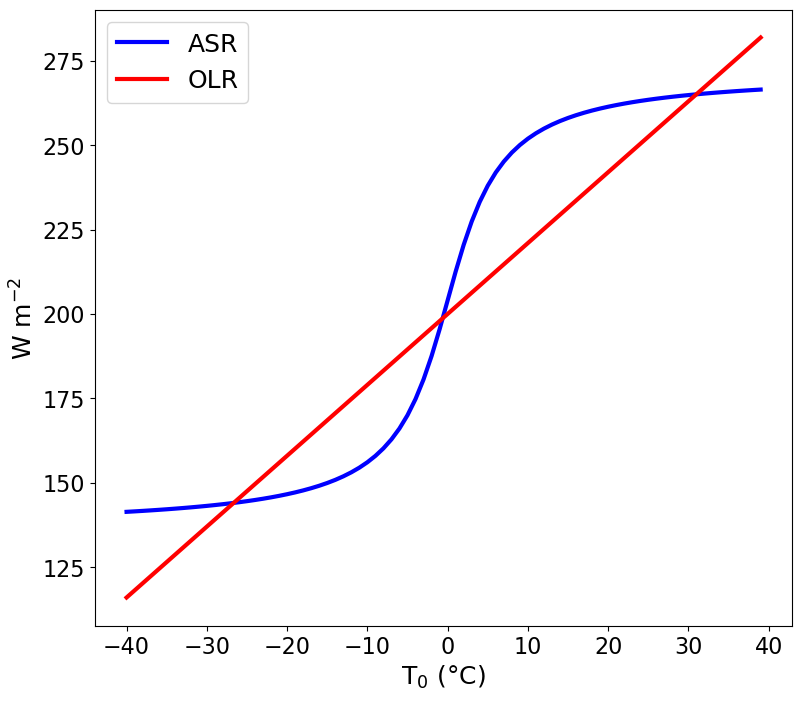

In [437]:
T = np.arange(-40,40)
ac = 0.6
aw = 0.2
gama = 5.
S0 = 1360.
A = 200.
B = 2.1
alpha = ac-(ac-aw)*(0.5+np.arctan(T/gama)/np.pi)
ASR = S0/4.*(1-alpha)
OLR = A + B*T

fig, ax = plt.subplots(figsize=(9,8))
ax.plot(T, ASR, linewidth=3, color='blue', label='ASR')
ax.plot(T, OLR, linewidth=3, color='red', label='OLR')
#ax.grid()
ax.legend(loc='best', fontsize=18)
ax.set_xlabel('T$_0$ ($\degree$C)', fontsize=18)
ax.set_ylabel('W m$^{-2}$', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=16)

# os.chdir('/nfs/home11/grad/2017/fz172169/0notebook')
# plt.savefig('EBM.pdf')

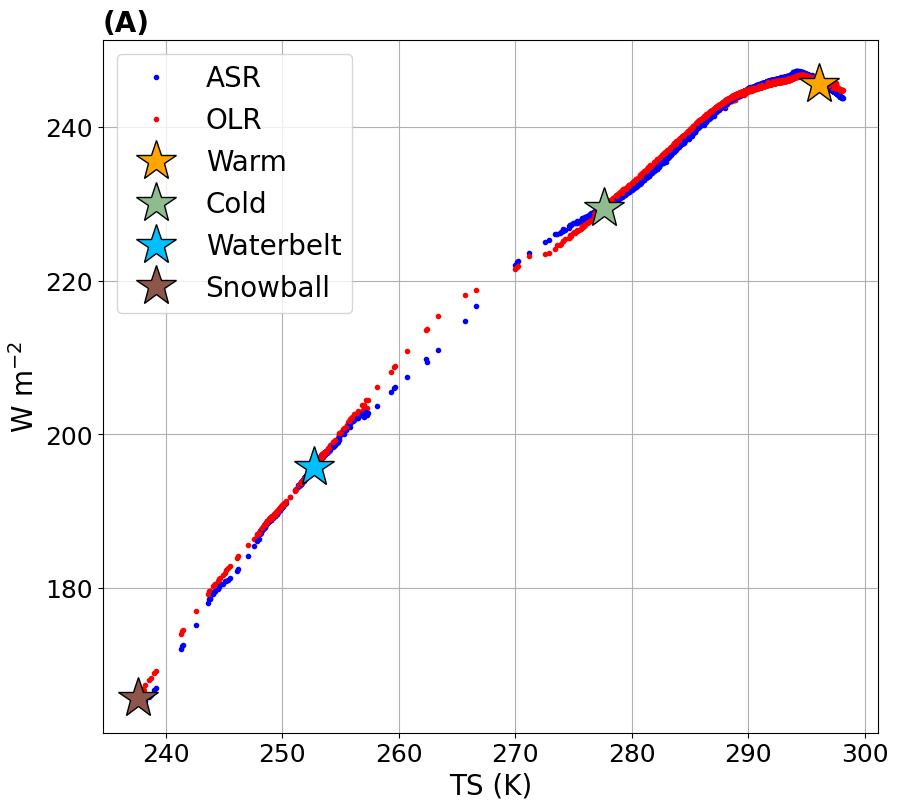

In [461]:
fig, ax1 = plt.subplots(figsize=(10,9))

exp = [exp_warm, exp_cold, exp_waterbelt, warm_list, cold_list, waterbelt_list, snowball_list]

color1 = ['blue','red']
color2 = ['blue','tab:green']
mksize_TSR = 6
mksize_OLR = 6
mksize2 = 30

for run_list in exp:
    TSR_list = []
    OLR_list = []
    TS_list = []
    for run in run_list:
        startpoint = 25
        if run_list == warm_list:
            TSR_list.append(TSR[run][startpoint:])
            OLR_list.append(OLR[run][startpoint:])
            TS_list.append(TS[run][startpoint:])
        else:     
            TSR_list.append(TSR[run])
            OLR_list.append(OLR[run])
            TS_list.append(TS[run])
    
    if run_list == exp_warm:
        ax1.plot( TS_list[0], TSR_list[0], '.' , color=color1[0], markersize=mksize_TSR, label='ASR')
        ax1.plot( TS_list[0], OLR_list[0], '.' , color=color1[1], markersize=mksize_OLR, label='OLR')
    else:
        for i in range(len(TS_list)):
            ax1.plot( TS_list[i], TSR_list[i], '.' , color=color1[0], markersize=mksize_TSR)
            ax1.plot( TS_list[i], OLR_list[i], '.' , color=color1[1], markersize=mksize_OLR)
     
            
ax1.plot(TS[exp_warm[0]][-1], TSR[exp_warm[0]][-1], '*', 
         color='orange', markersize=mksize2, label='Warm', markeredgecolor='k')
ax1.plot(TS[exp_cold[0]][-1], TSR[exp_cold[0]][-1], '*', 
         color='darkseagreen', markersize=mksize2, label='Cold', markeredgecolor='k')
ax1.plot(TS[exp_waterbelt[0]][-1], TSR[exp_waterbelt[0]][-1], '*', 
         color='deepskyblue', markersize=mksize2, label='Waterbelt', markeredgecolor='k')
ax1.plot(TS[exp_snowball[0]][-1], TSR[exp_snowball[0]][-1], '*', 
         color='tab:brown', markersize=mksize2, label='Snowball', markeredgecolor='k')
    
ax1.set_xlabel('TS (K)', fontsize=20)
ax1.set_ylabel('W m$^{-2}$', fontsize=20)
ax1.set_title('(A)', loc='left', fontsize=20, fontweight='bold')
ax1.legend(fontsize=20)
ax1.grid()
ax1.tick_params(axis='both', which='major', labelsize=18)

# os.chdir('/nfs/home11/grad/2017/fz172169/0notebook')
# plt.savefig('TOA_scatter_list.pdf')

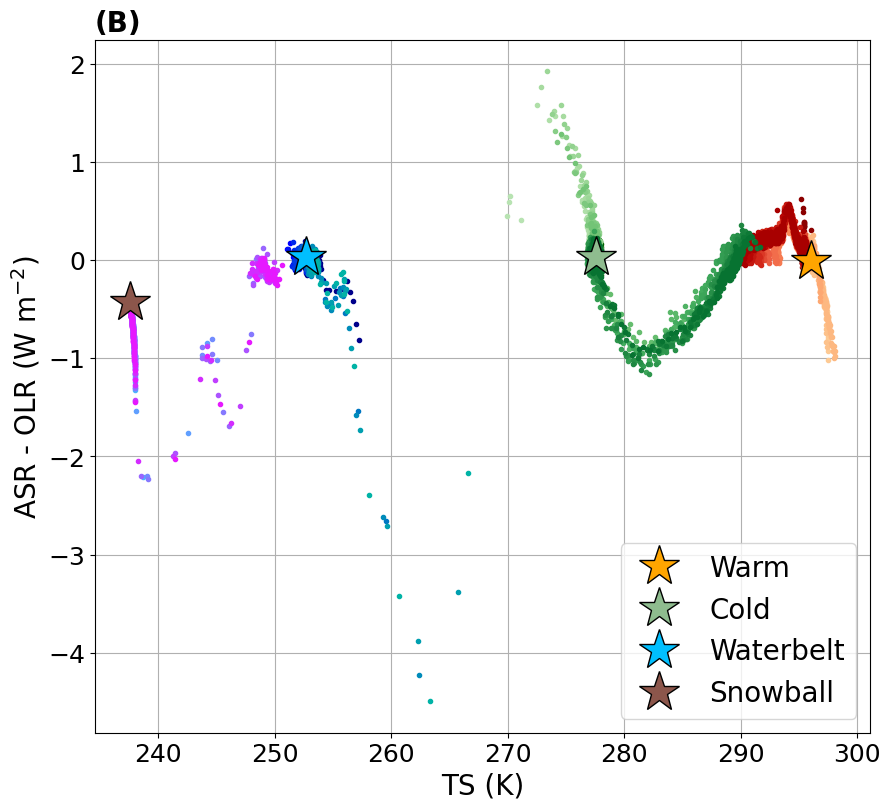

In [462]:
fig, ax1 = plt.subplots(figsize=(10,9))

exp = [exp_warm, exp_cold, exp_waterbelt, warm_list, cold_list, waterbelt_list, snowball_list]

mksize1 = 6
mksize2 = 30

nwarm = len(warm_list)
ncold = len(cold_list)
nwaterbelt = len(waterbelt_list)
nsnowball = len(snowball_list)

color_warm = plt.cm.OrRd(np.linspace(0.3,0.9,nwarm))
color_cold = plt.cm.Greens(np.linspace(0.3,0.85,ncold))
color_waterbelt = plt.cm.winter(np.linspace(0,0.7,nwaterbelt))
color_snowball = plt.cm.cool(np.linspace(0.3,0.9,nsnowball))

for run_list in exp:
    TSR_list = []
    OLR_list = []
    TS_list = []
    for run in run_list:
        startpoint = 25
        if run_list == warm_list:
            TSR_list.append(TSR[run][startpoint:])
            OLR_list.append(OLR[run][startpoint:])
            TS_list.append(TS[run][startpoint:])
        else:     
            TSR_list.append(TSR[run])
            OLR_list.append(OLR[run])
            TS_list.append(TS[run])
            
    if run_list == exp_warm:
        ax1.plot( TS_list[0], TSR_list[0] - OLR_list[0], '.' , color='darkred', markersize=mksize1)
    if run_list == exp_cold:
        ax1.plot( TS_list[0], TSR_list[0] - OLR_list[0], '.' , color='darkgreen', markersize=mksize1)
    if run_list == exp_waterbelt:
        ax1.plot( TS_list[0], TSR_list[0] - OLR_list[0], '.' , color='darkblue', markersize=mksize1)
    if run_list == warm_list:
        for i in range(len(TS_list)):
            if i == len(TS_list)-1:
                ax1.plot(TS_list[i], TSR_list[i] - OLR_list[i], '.' , color=color_warm[i],markersize=mksize1)
            else:
                ax1.plot(TS_list[i], TSR_list[i] - OLR_list[i], '.' , color=color_warm[i],markersize=mksize1)
    if run_list == cold_list:
        for i in range(len(TS_list)):
            if i == len(TS_list)-1:
                ax1.plot(TS_list[i], TSR_list[i] - OLR_list[i], '.' , color=color_cold[i],markersize=mksize1)
            else:
                ax1.plot(TS_list[i], TSR_list[i] - OLR_list[i], '.' , color=color_cold[i],markersize=mksize1)
    if run_list == waterbelt_list:
        for i in range(len(TS_list)):
            if i == 0:
                ax1.plot(TS_list[i], TSR_list[i]-OLR_list[i], '.' , color=color_waterbelt[i],markersize=mksize1)
            else:
                ax1.plot(TS_list[i], TSR_list[i]-OLR_list[i], '.' , color=color_waterbelt[i],markersize=mksize1)
    if run_list == snowball_list:
        for i in range(len(TS_list)):
            if i == len(TS_list)-1:
                ax1.plot(TS_list[i], TSR_list[i]-OLR_list[i], '.' , color=color_snowball[i],markersize=mksize1)
            else:
                ax1.plot(TS_list[i], TSR_list[i]-OLR_list[i], '.' , color=color_snowball[i],markersize=mksize1)
            
ax1.plot(TS[exp_warm[0]][-1], TSR[exp_warm[0]][-1]-OLR[exp_warm[0]][-1], '*', 
         color='orange', markersize=mksize2, label='Warm', markeredgecolor='k')
ax1.plot(TS[exp_cold[0]][-1], TSR[exp_cold[0]][-1]-OLR[exp_cold[0]][-1], '*', 
         color='darkseagreen', markersize=mksize2, label='Cold', markeredgecolor='k')
ax1.plot(TS[exp_waterbelt[0]][-1], TSR[exp_waterbelt[0]][-1]-OLR[exp_waterbelt[0]][-1], '*', 
         color='deepskyblue', markersize=mksize2, label='Waterbelt', markeredgecolor='k')
ax1.plot(TS[exp_snowball[0]][-1], TSR[exp_snowball[0]][-1]-OLR[exp_snowball[0]][-1], '*', 
         color='tab:brown', markersize=mksize2, label='Snowball', markeredgecolor='k')

ax1.set_xlabel('TS (K)', fontsize=20)
ax1.set_ylabel('ASR - OLR (W m$^{-2}$)', fontsize=20)
ax1.set_title('(B)', loc='left', fontsize=20, fontweight='bold')
ax1.legend(loc='lower right',fontsize=20)
ax1.grid()
#ax1.set_xlim(295.2,296.2)
#ax1.set_ylim(-0.3,0.3)
ax1.tick_params(axis='both', which='major', labelsize=18)

# os.chdir('/nfs/home11/grad/2017/fz172169/0notebook')
# plt.savefig('TOA_net_scatter_list.pdf')

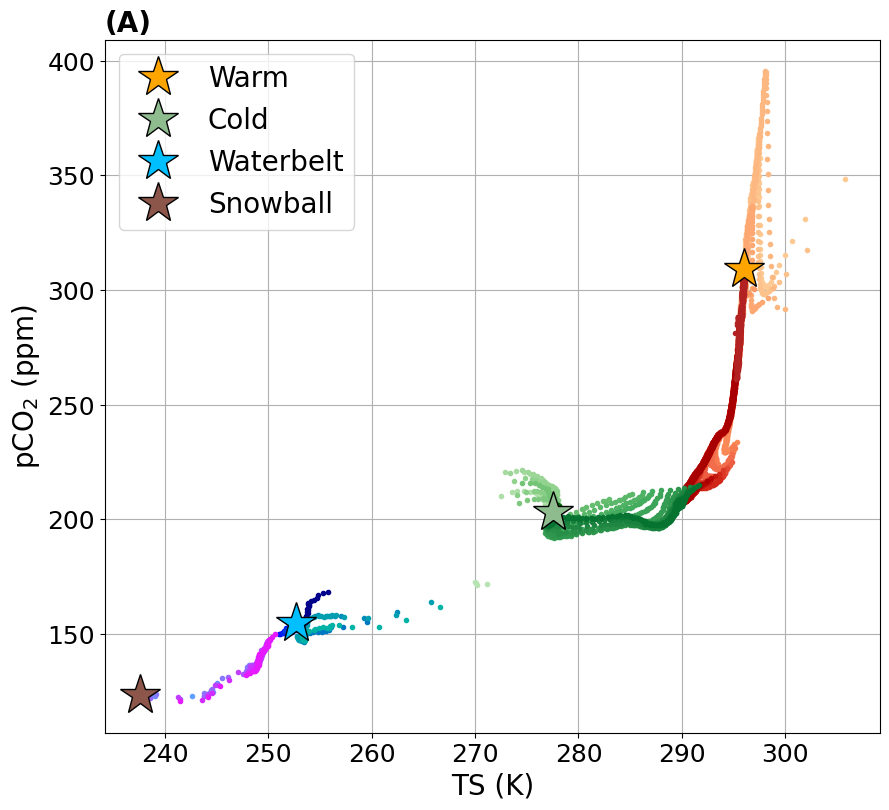

In [463]:
pCO2_20y = {}
fig, ax1 = plt.subplots(figsize=(10,9))

exp = [warm_list, cold_list, waterbelt_list, snowball_list, exp_warm, exp_cold, exp_waterbelt]

mksize1 = 6
mksize2 = 30
colors = ['tab:red', 'darkseagreen', 'tab:blue', 'tab:purple']

nwarm = len(warm_list)
ncold = len(cold_list)
nwaterbelt = len(waterbelt_list)
nsnowball = len(snowball_list)

color_warm = plt.cm.OrRd(np.linspace(0.3,0.9,nwarm))
color_cold = plt.cm.Greens(np.linspace(0.3,0.85,ncold))
color_waterbelt = plt.cm.winter(np.linspace(0,0.7,nwaterbelt))
color_snowball = plt.cm.cool(np.linspace(0.3,0.9,nsnowball))

for run_list in exp:
    pCO2_list = []
    TS_list = []
    for run in run_list:
        pCO2_20y[run] = np.zeros(len(TS[run]))
        for n in range(len(pCO2_20y[run])):
            pCO2_20y[run][n] = np.mean(pCO2[run][n*240:(n+1)*240])
            
        startpoint = 5
        if run_list == exp_waterbelt:
            pCO2_list.append(pCO2_20y[run][startpoint:])
            TS_list.append(TS[run][startpoint:])
        else:     
            pCO2_list.append(pCO2_20y[run])
            TS_list.append(TS[run])
    
    
    if run_list == exp_warm:
        ax1.plot( TS_list[0], pCO2_list[0], '.' , color='firebrick', markersize=mksize1)
    if run_list == exp_cold:
        ax1.plot( TS_list[0], pCO2_list[0], '.' , color='darkgreen', markersize=mksize1)
    if run_list == exp_waterbelt:
        ax1.plot( TS_list[0], pCO2_list[0], '.' , color='darkblue', markersize=mksize1)
    if run_list == warm_list:
        for i in range(len(TS_list)):
            if i == len(TS_list)-1:
                ax1.plot(TS_list[i], pCO2_list[i], '.' , color=color_warm[i], markersize=mksize1)
            else:
                ax1.plot( TS_list[i], pCO2_list[i], '.' , color=color_warm[i], markersize=mksize1)
    if run_list == cold_list:
        for i in range(len(TS_list)):
            if i == len(TS_list)-1:
                ax1.plot(TS_list[i], pCO2_list[i], '.' , color=color_cold[i], markersize=mksize1)
            else:
                ax1.plot( TS_list[i], pCO2_list[i], '.' , color=color_cold[i], markersize=mksize1)
    if run_list == waterbelt_list:
        for i in range(len(TS_list)):
            if i == 0:
                ax1.plot(TS_list[i], pCO2_list[i], '.' , color=color_waterbelt[i], markersize=mksize1)
            else:
                ax1.plot( TS_list[i], pCO2_list[i], '.' , color=color_waterbelt[i], markersize=mksize1)
    if run_list == snowball_list:
        for i in range(len(TS_list)):
            if i == len(TS_list)-1:
                ax1.plot(TS_list[i], pCO2_list[i], '.' , color=color_snowball[i], markersize=mksize1)
            else:
                ax1.plot( TS_list[i], pCO2_list[i], '.' , color=color_snowball[i], markersize=mksize1)

                
ax1.plot(TS[exp_warm[0]][-1], pCO2_20y[exp_warm[0]][-1], '*', 
         color='orange', markersize=mksize2, label='Warm', markeredgecolor='k')
ax1.plot(TS[exp_cold[0]][-1], pCO2_20y[exp_cold[0]][-1], '*', 
         color='darkseagreen', markersize=mksize2, label='Cold', markeredgecolor='k')
ax1.plot(TS[exp_waterbelt[0]][-1], pCO2_20y[exp_waterbelt[0]][-1], '*', 
         color='deepskyblue', markersize=mksize2, label='Waterbelt', markeredgecolor='k')
ax1.plot(TS[exp_snowball[0]][-1], pCO2_20y[exp_snowball[0]][-1], '*', 
         color='tab:brown', markersize=mksize2, label='Snowball', markeredgecolor='k')
   
ax1.set_xlabel('TS (K)', fontsize=20)
ax1.set_ylabel('pCO$_2$ (ppm)', fontsize=20)
ax1.set_title('(A)', loc='left', fontsize=20, fontweight='bold')
ax1.legend(fontsize=20)
ax1.grid()
ax1.tick_params(axis='both', which='major', labelsize=18)

# os.chdir('/nfs/home11/grad/2017/fz172169/0notebook')
# plt.savefig('pCO2_scatter.pdf')

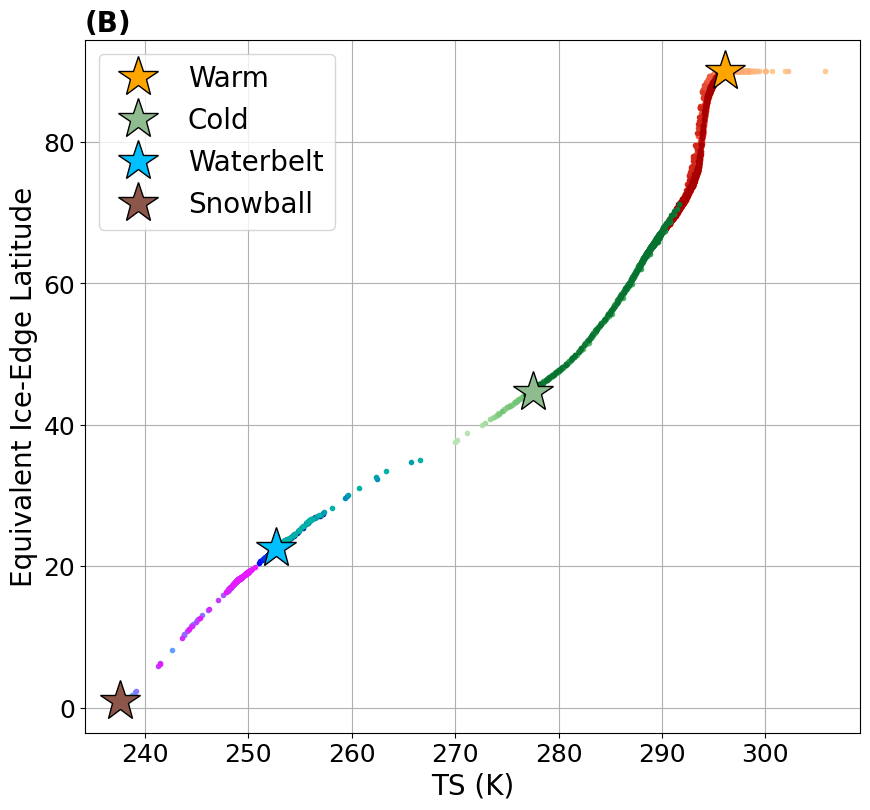

In [464]:
icelat_20y = {}

fig, ax1 = plt.subplots(figsize=(10,9))

exp = [exp_warm, exp_cold, exp_waterbelt, warm_list, cold_list, waterbelt_list, snowball_list]

mksize1 = 6
mksize2 = 30

nwarm = len(warm_list)
ncold = len(cold_list)
nwaterbelt = len(waterbelt_list)
nsnowball = len(snowball_list)

color_warm = plt.cm.OrRd(np.linspace(0.3,0.9,nwarm))
color_cold = plt.cm.Greens(np.linspace(0.3,0.85,ncold))
color_waterbelt = plt.cm.winter(np.linspace(0,0.7,nwaterbelt))
color_snowball = plt.cm.cool(np.linspace(0.3,0.9,nsnowball))

for run_list in exp:
    icelat_list = []
    TS_list = []
    for run in run_list:
        icelat_20y[run] = np.zeros(len(TS[run]))
        for n in range(len(icelat_20y[run])):
            icelat_20y[run][n] = np.mean(icelat[run][n*240:(n+1)*240])
        icelat_list.append(icelat_20y[run])
        TS_list.append(TS[run])

        
    if run_list == exp_warm:
        ax1.plot( TS_list[0], icelat_list[0], '.' , color='darkred', markersize=mksize1)
    if run_list == exp_cold:
        ax1.plot( TS_list[0], icelat_list[0], '.' , color='darkgreen', markersize=mksize1)
    if run_list == exp_waterbelt:
        ax1.plot( TS_list[0], icelat_list[0], '.' , color='darkblue', markersize=mksize1)
    if run_list == warm_list:
        for i in range(len(TS_list)):
            if i == len(TS_list)-1:
                ax1.plot(TS_list[i], icelat_list[i], '.' , color=color_warm[i], markersize=mksize1)
            else:
                ax1.plot( TS_list[i], icelat_list[i], '.' , color=color_warm[i], markersize=mksize1)
    if run_list == cold_list:
        for i in range(len(TS_list)):
            if i == len(TS_list)-1:
                ax1.plot(TS_list[i], icelat_list[i], '.' , color=color_cold[i], markersize=mksize1)
            else:
                ax1.plot( TS_list[i], icelat_list[i], '.' , color=color_cold[i], markersize=mksize1)
    if run_list == waterbelt_list:
        for i in range(len(TS_list)):
            if i == 0:
                ax1.plot(TS_list[i], icelat_list[i], '.' , color=color_waterbelt[i], markersize=mksize1)
            else:
                ax1.plot( TS_list[i], icelat_list[i], '.' , color=color_waterbelt[i], markersize=mksize1)
    if run_list == snowball_list:
        for i in range(len(TS_list)):
            if i == len(TS_list)-1:
                ax1.plot(TS_list[i], icelat_list[i], '.' , color=color_snowball[i], markersize=mksize1)
            else:
                ax1.plot( TS_list[i], icelat_list[i], '.' , color=color_snowball[i], markersize=mksize1)

            
ax1.plot(TS[exp_warm[0]][-1], icelat[exp_warm[0]][-1], '*', 
         color='orange', markersize=mksize2, label='Warm', markeredgecolor='k')
ax1.plot(TS[exp_cold[0]][-1], icelat[exp_cold[0]][-1], '*', 
         color='darkseagreen', markersize=mksize2, label='Cold', markeredgecolor='k')
ax1.plot(TS[exp_waterbelt[0]][-1], icelat[exp_waterbelt[0]][-1], '*', 
         color='deepskyblue', markersize=mksize2, label='Waterbelt', markeredgecolor='k')
ax1.plot(TS[exp_snowball[0]][-1], icelat[exp_snowball[0]][-1], '*', 
         color='tab:brown', markersize=mksize2, label='Snowball', markeredgecolor='k')

ax1.set_xlabel('TS (K)', fontsize=20)
ax1.set_ylabel('Equivalent Ice-Edge Latitude', fontsize=20)
ax1.set_title('(B)', loc='left', fontsize=20, fontweight='bold')
ax1.legend(fontsize=20)
ax1.grid()
#ax1.set_ylim(0, 90)
ax1.tick_params(axis='both', which='major', labelsize=18)

# os.chdir('/nfs/home11/grad/2017/fz172169/0notebook')
# plt.savefig('icelat_scatter.pdf')

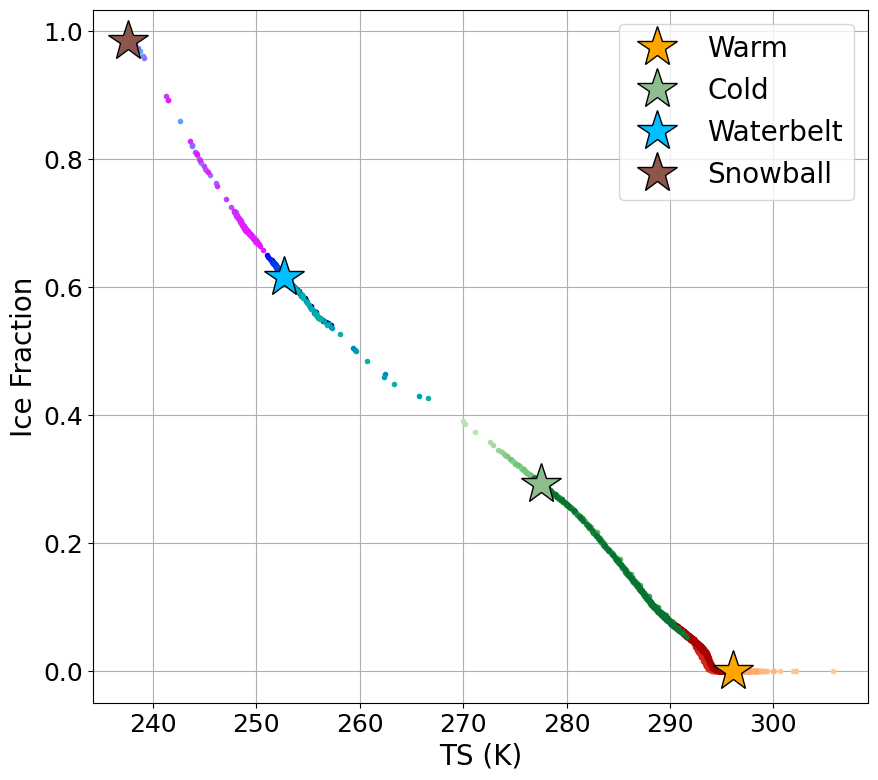

In [473]:
fig, ax1 = plt.subplots(figsize=(10,9))

exp = [exp_warm, exp_cold, exp_waterbelt, warm_list, cold_list, waterbelt_list, snowball_list]

mksize1 = 6
mksize2 = 30

nwarm = len(warm_list)
ncold = len(cold_list)
nwaterbelt = len(waterbelt_list)
nsnowball = len(snowball_list)

color_warm = plt.cm.OrRd(np.linspace(0.3,0.9,nwarm))
color_cold = plt.cm.Greens(np.linspace(0.3,0.85,ncold))
color_waterbelt = plt.cm.winter(np.linspace(0,0.7,nwaterbelt))
color_snowball = plt.cm.cool(np.linspace(0.3,0.9,nsnowball))

for run_list in exp:
    icefrac_list = []
    TS_list = []
    for run in run_list:
        icefrac_list.append(icefract[run])
        TS_list.append(TS[run])

    
    if run_list == exp_warm:
        ax1.plot( TS_list[0], icefrac_list[0], '.' , color='darkred', markersize=mksize1)
    if run_list == exp_cold:
        ax1.plot( TS_list[0], icefrac_list[0], '.' , color='darkgreen', markersize=mksize1)
    if run_list == exp_waterbelt:
        ax1.plot( TS_list[0], icefrac_list[0], '.' , color='darkblue', markersize=mksize1)
    if run_list == warm_list:
        for i in range(len(TS_list)):
            if i == len(TS_list)-1:
                ax1.plot(TS_list[i], icefrac_list[i], '.' , color=color_warm[i], markersize=mksize1)
            else:
                ax1.plot( TS_list[i], icefrac_list[i], '.' , color=color_warm[i], markersize=mksize1)
    if run_list == cold_list:
        for i in range(len(TS_list)):
            if i == len(TS_list)-1:
                ax1.plot(TS_list[i], icefrac_list[i], '.' , color=color_cold[i], markersize=mksize1)
            else:
                ax1.plot( TS_list[i], icefrac_list[i], '.' , color=color_cold[i], markersize=mksize1)
    if run_list == waterbelt_list:
        for i in range(len(TS_list)):
            if i == 0:
                ax1.plot(TS_list[i], icefrac_list[i], '.' , color=color_waterbelt[i], markersize=mksize1)
            else:
                ax1.plot( TS_list[i], icefrac_list[i], '.' , color=color_waterbelt[i], markersize=mksize1)
    if run_list == snowball_list:
        for i in range(len(TS_list)):
            if i == len(TS_list)-1:
                ax1.plot(TS_list[i], icefrac_list[i], '.' , color=color_snowball[i], markersize=mksize1)
            else:
                ax1.plot( TS_list[i], icefrac_list[i], '.' , color=color_snowball[i], markersize=mksize1)

            
ax1.plot(TS[exp_warm[0]][-1], icefract[exp_warm[0]][-1], '*', 
         color='orange', markersize=mksize2, label='Warm', markeredgecolor='k')
ax1.plot(TS[exp_cold[0]][-1], icefract[exp_cold[0]][-1], '*', 
         color='darkseagreen', markersize=mksize2, label='Cold', markeredgecolor='k')
ax1.plot(TS[exp_waterbelt[0]][-1], icefract[exp_waterbelt[0]][-1], '*', 
         color='deepskyblue', markersize=mksize2, label='Waterbelt', markeredgecolor='k')
ax1.plot(TS[exp_snowball[0]][-1], icefract[exp_snowball[0]][-1], '*', 
         color='tab:brown', markersize=mksize2, label='Snowball', markeredgecolor='k')

ax1.set_xlabel('TS (K)', fontsize=20)
ax1.set_ylabel('Ice Fraction', fontsize=20)
# ax1.set_title('(B)', loc='left', fontsize=20, fontweight='bold')
ax1.legend(fontsize=20)
ax1.grid()
#ax1.set_ylim(0, 90)
ax1.tick_params(axis='both', which='major', labelsize=18)

# os.chdir('/nfs/home11/grad/2017/fz172169/0notebook')
# plt.savefig('icefract_scatter.pdf')

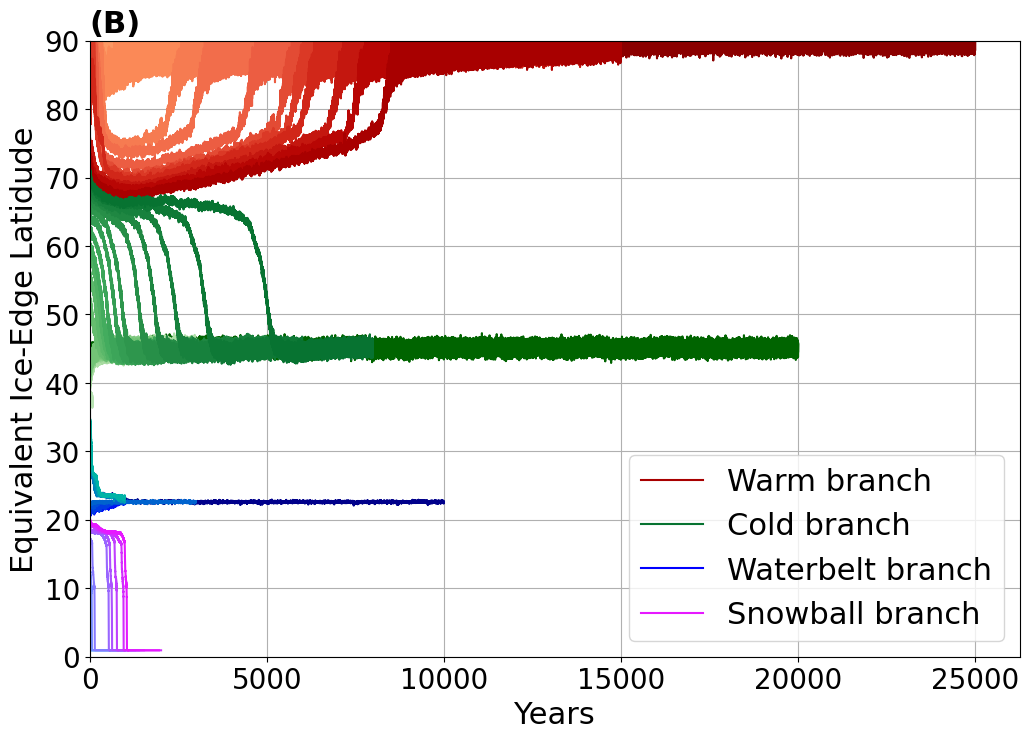

In [466]:
fig, ax1 = plt.subplots(figsize=(12,8))

exp = [exp_warm, exp_cold, exp_waterbelt, warm_list, cold_list, waterbelt_list, snowball_list]

for run_list in exp:
    icelat_list = []   
    for run in run_list:
        icelat_list.append(icelat[run])

    
    nwarm = len(warm_list)
    ncold = len(cold_list)
    nwaterbelt = len(waterbelt_list)
    nsnowball = len(snowball_list)
    
    color_warm = plt.cm.OrRd(np.linspace(0.3,0.9,nwarm))
    color_cold = plt.cm.Greens(np.linspace(0.3,0.85,ncold))
    color_waterbelt = plt.cm.winter(np.linspace(0,0.7,nwaterbelt))
    color_snowball = plt.cm.cool(np.linspace(0.3,0.9,nsnowball))
    
    if run_list == exp_warm:
        years = np.arange(icelat_list[0].size)/12
        ax1.plot( years, icelat_list[0], color='darkred')
    elif run_list == exp_cold:
        years = np.arange(icelat_list[0].size)/12
        ax1.plot( years, icelat_list[0], color='darkgreen')
    elif run_list == exp_waterbelt:
        years = np.arange(icelat_list[0].size)/12
        ax1.plot( years, icelat_list[0], color='darkblue')
    elif run_list == warm_list:
        for i in range(len(icelat_list)):
            years = np.arange(icelat_list[i].size)/12
            if i == len(icelat_list)-1:
                ax1.plot( years, icelat_list[i], color=color_warm[i], label='Warm branch')
            else:
                ax1.plot( years, icelat_list[i], color=color_warm[i])  
    elif run_list == cold_list:
        for i in range(len(icelat_list)):
            years = np.arange(icelat_list[i].size)/12
            if i == len(icelat_list)-1:
                ax1.plot( years, icelat_list[i], color=color_cold[i], label='Cold branch')
            else:
                ax1.plot( years, icelat_list[i], color=color_cold[i])
    elif run_list == waterbelt_list:
        for i in range(len(icelat_list)):
            years = np.arange(icelat_list[i].size)/12
            if i == 0:
                ax1.plot( years, icelat_list[i], color=color_waterbelt[i], label='Waterbelt branch')
            else:
                ax1.plot( years, icelat_list[i], color=color_waterbelt[i])
    else:
        for i in range(len(icelat_list)):
            years = np.arange(icelat_list[i].size)/12
            if i == len(icelat_list)-1:
                ax1.plot( years, icelat_list[i], color=color_snowball[i], label='Snowball branch')
            else:
                ax1.plot( years, icelat_list[i], color=color_snowball[i])    
    
ax1.grid()
ax1.legend(loc='lower right', fontsize=22)
ax1.set_ylabel('Equivalent Ice-Edge Latidude', fontsize=22)
ax1.set_xlabel('Years', fontsize=22)
ax1.set_title('(B)', loc='left', fontsize=22, fontweight='bold')
ax1.set_xlim(left=0)
ax1.set_ylim(0, 90)
ax1.tick_params(axis='both', which='major', labelsize=20)

# os.chdir('/nfs/home11/grad/2017/fz172169/0notebook')
# plt.savefig('monitor_icelat.pdf')

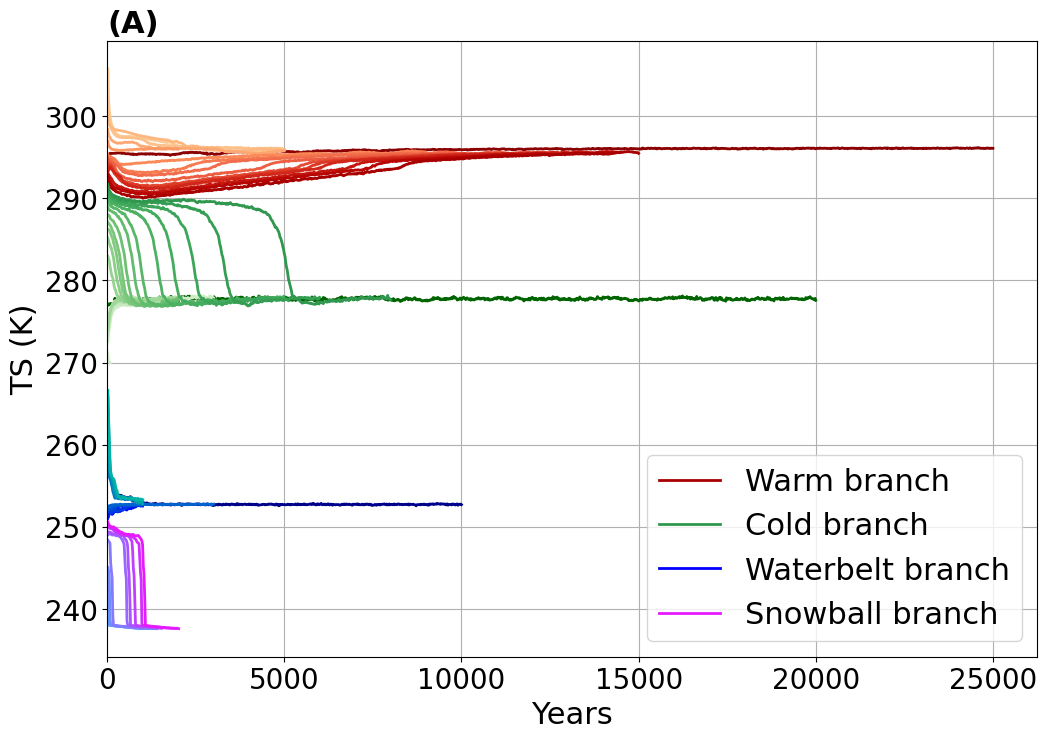

In [467]:
exp = [exp_warm, exp_cold, exp_waterbelt, warm_list, cold_list, waterbelt_list, snowball_list]

fig, axes = plt.subplots(figsize=(12,8))

for run_list in exp:
    TS_list = []    
    for run in run_list:
        TS_list.append(TS[run])
    
    nwarm = len(warm_list)
    ncold = len(cold_list)
    nwaterbelt = len(waterbelt_list)
    nsnowball = len(snowball_list)
    
    color_warm = plt.cm.OrRd(np.linspace(0.3,0.9,nwarm))
    color_cold = plt.cm.Greens(np.linspace(0.2,0.7,ncold))
    color_waterbelt = plt.cm.winter(np.linspace(0,0.7,nwaterbelt))
    color_snowball = plt.cm.cool(np.linspace(0.3,0.9,nsnowball))
    linewidth = 2
    
    if run_list == exp_warm:
        years = np.arange(1, TS_list[0].size+1) * 20
        axes.plot( years, TS_list[0], linewidth=linewidth, color='darkred')
#         print(TS_list[0][-1])
    elif run_list == exp_cold:
        years = np.arange(1, TS_list[0].size+1) * 20
        axes.plot( years, TS_list[0], linewidth=linewidth, color='darkgreen')
#         print(TS_list[0][-1])
    elif run_list == exp_waterbelt:
        years = np.arange(1, TS_list[0].size+1) * 20
        axes.plot( years, TS_list[0], linewidth=linewidth, color='darkblue')
#         print(TS_list[0][-1])
    elif run_list == warm_list:
        for i in range(len(TS_list)):
            years = np.arange(1, TS_list[i].size+1) * 20
            if i == len(TS_list)-1:
                axes.plot( years, TS_list[i], linewidth=linewidth, color=color_warm[i], label='Warm branch')
            else:
                axes.plot( years, TS_list[i], linewidth=linewidth, color=color_warm[i])  
    elif run_list == cold_list:
        for i in range(len(TS_list)):
            years = np.arange(1, TS_list[i].size+1) * 20
            if i == len(TS_list)-1:
                axes.plot( years, TS_list[i], linewidth=linewidth, color=color_cold[i], label='Cold branch')
            else:
                axes.plot( years, TS_list[i], linewidth=linewidth, color=color_cold[i])
    elif run_list == waterbelt_list:
        for i in range(len(TS_list)):
            years = np.arange(1, TS_list[i].size+1) * 20
            if i == 0:
                axes.plot( years, TS_list[i], linewidth=linewidth, color=color_waterbelt[i], 
                          label='Waterbelt branch')
            else:
                axes.plot( years, TS_list[i], linewidth=linewidth, color=color_waterbelt[i])
    else:
        for i in range(len(TS_list)):
            years = np.arange(1, TS_list[i].size+1) * 20
            if i == len(TS_list)-1:
                axes.plot( years, TS_list[i], linewidth=linewidth, color=color_snowball[i], 
                          label='Snowball branch')
            else:
                axes.plot( years, TS_list[i], linewidth=linewidth, color=color_snowball[i]) 
            #print(TS_list[0][-1])


axes.set_title('(A)', loc='left', fontsize=22, fontweight='bold')
axes.set_ylabel('TS (K)', fontsize=22)
axes.set_xlabel('Years', fontsize=22)
axes.set_xlim(left=0)
axes.grid()
axes.legend(fontsize=22)
axes.tick_params(axis='both', which='major', labelsize=20)
    

# os.chdir('/nfs/home11/grad/2017/fz172169/0notebook')
# plt.savefig('TS.pdf')

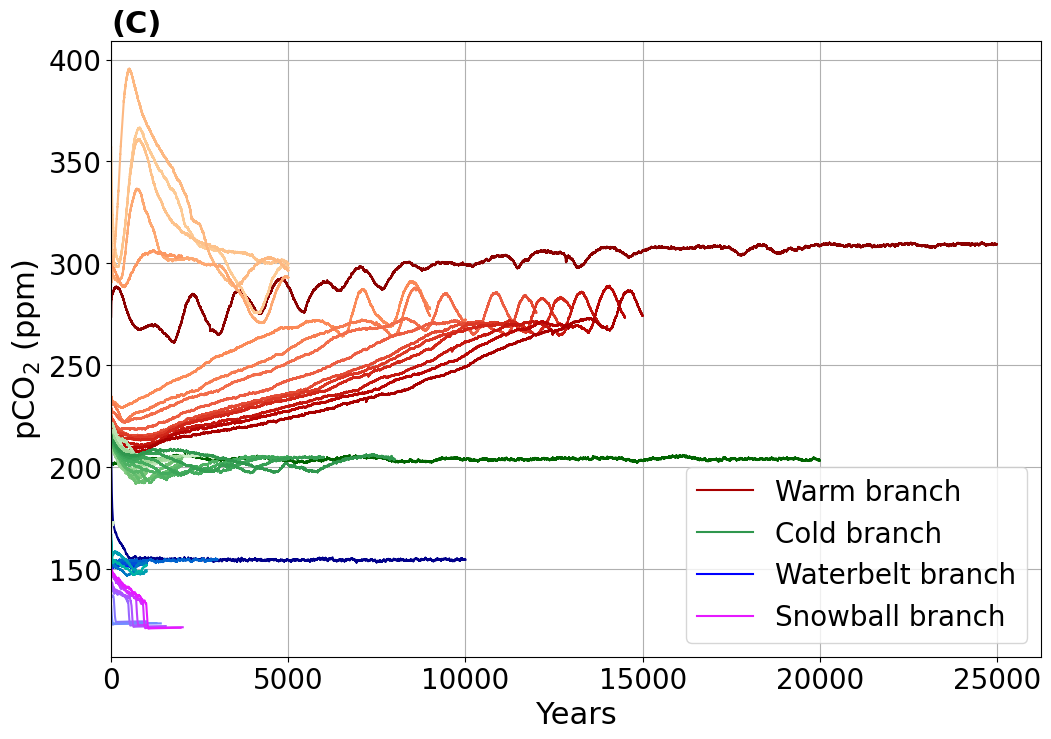

In [468]:
exp = [exp_warm, exp_cold, exp_waterbelt, warm_list, cold_list, waterbelt_list, snowball_list]

f_pCO2 = 'pCO2StDiag.*'
flen_pCO2 = 240
var_pCO2 = ['aim_pCO2_ave']

fig, axes = plt.subplots(figsize=(12,8))

for run_list in exp:
    pCO2_list = []   
    for run in run_list:
        pCO2_list.append(pCO2[run])
    
    nwarm = len(warm_list)
    ncold = len(cold_list)
    nwaterbelt = len(waterbelt_list)
    nsnowball = len(snowball_list)
    
    color_warm = plt.cm.OrRd(np.linspace(0.3,0.9,nwarm))
    color_cold = plt.cm.Greens(np.linspace(0.2,0.7,ncold))
    color_waterbelt = plt.cm.winter(np.linspace(0,0.7,nwaterbelt))
    color_snowball = plt.cm.cool(np.linspace(0.3,0.9,nsnowball))
    linewidth = 1.5
    
    if run_list == exp_warm:
        years = np.arange(pCO2_list[0].size)/12
        #print(pCO2_list[0][-1])
        axes.plot( years, pCO2_list[0], linewidth=linewidth, color='darkred')
    elif run_list == exp_cold:
        years = np.arange(pCO2_list[0].size)/12
        #print(pCO2_list[0][-1])
        axes.plot( years, pCO2_list[0], linewidth=linewidth, color='darkgreen')
    elif run_list == exp_waterbelt:
        years = np.arange(pCO2_list[0].size)/12
        #print(pCO2_list[0][-1])
        axes.plot( years, pCO2_list[0], linewidth=linewidth, color='darkblue')
    elif run_list == warm_list:
        for i in range(len(pCO2_list)):
            years = np.arange(pCO2_list[i].size)/12
            if i == len(pCO2_list)-1:
                axes.plot( years, pCO2_list[i], linewidth=linewidth, color=color_warm[i], label='Warm branch')
            else:
                axes.plot( years, pCO2_list[i], linewidth=linewidth, color=color_warm[i])  
    elif run_list == cold_list:
        for i in range(len(pCO2_list)):
            years = np.arange(pCO2_list[i].size)/12
            if i == len(pCO2_list)-1:
                axes.plot( years, pCO2_list[i], linewidth=linewidth, color=color_cold[i], label='Cold branch')
            else:
                axes.plot( years, pCO2_list[i], linewidth=linewidth, color=color_cold[i])
    elif run_list == waterbelt_list:
        for i in range(len(pCO2_list)):
            years = np.arange(pCO2_list[i].size)/12
            if i == 0:
                axes.plot( years, pCO2_list[i], linewidth=linewidth, color=color_waterbelt[i], 
                          label='Waterbelt branch')
            else:
                axes.plot( years, pCO2_list[i], linewidth=linewidth, color=color_waterbelt[i])
    else:
        for i in range(len(pCO2_list)):
            years = np.arange(pCO2_list[i].size)/12
            if i == len(pCO2_list)-1:
                axes.plot( years, pCO2_list[i], linewidth=linewidth, color=color_snowball[i], 
                          label='Snowball branch')
            else:
                axes.plot( years, pCO2_list[i], linewidth=linewidth, color=color_snowball[i]) 


axes.set_title('(C)', loc='left', fontsize=22, fontweight='bold')
axes.set_ylabel('pCO$_2$ (ppm)', fontsize=22)
axes.set_xlabel('Years', fontsize=22)
axes.set_xlim(left=0)
axes.grid()
axes.legend(loc='lower right', fontsize=20)
axes.tick_params(axis='both', which='major', labelsize=20)
    
# os.chdir('/nfs/home11/grad/2017/fz172169/0notebook')
# plt.savefig('pCO2.pdf')

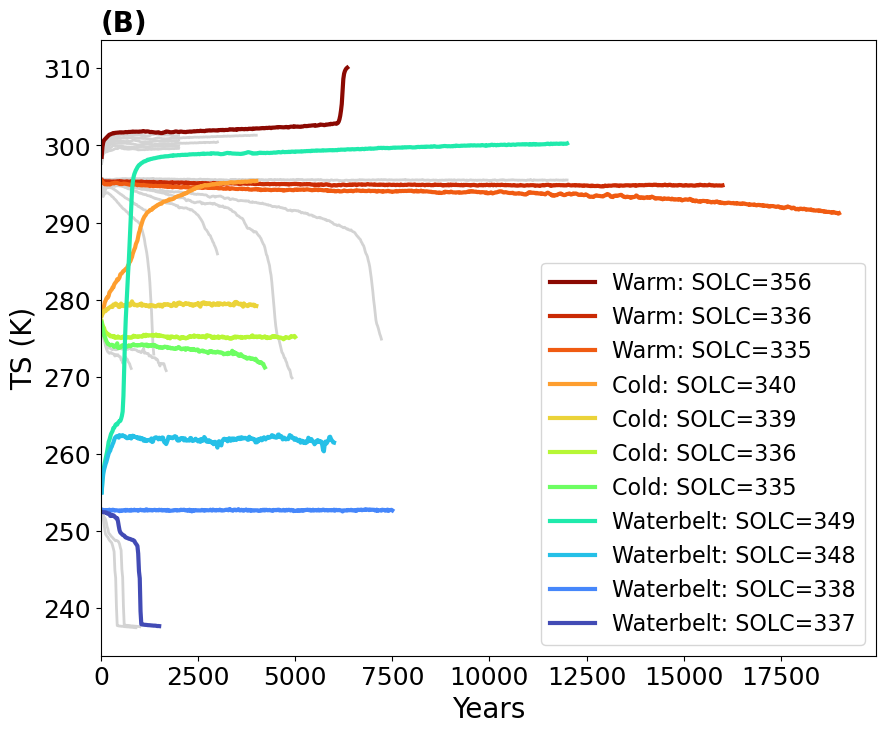

In [469]:
extra_run = ['radCO2_warm_SC355', \
             'radCO2_warm_SC354', \
             'radCO2_warm_SC353', \
             'radCO2_warm_SC352', \
             'radCO2_warm_SC351', \
             'radCO2_warm_SC350', \
             'radCO2_warm_SC337', \
             'radCO2_warm_SC334', \
             'radCO2_warm_SC333', \
             'radCO2_warm_SC332', \
             'radCO2_warm_SC330', \
             'radCO2_warm_SC328', \
             'radCO2_cold_SC334.5', \
#              'radCO2_cold_SC334.9', \
#              'radCO2_cold_SC334.8', \
#              'radCO2_cold_SC334.7', \
#              'radCO2_cold_SC334.6', \
             'radCO2_cold_SC334', \
             'radCO2_waterbelt_SC336', \
             'radCO2_waterbelt_SC335', \
             ]
label_TS = ['Warm: SOLC=356',
            'Warm: SOLC=336',
            'Warm: SOLC=335',
            'Cold: SOLC=340',
            'Cold: SOLC=339',
            'Cold: SOLC=336',
            'Cold: SOLC=335',
            'Waterbelt: SOLC=349',
            'Waterbelt: SOLC=348',
            'Waterbelt: SOLC=338',
            'Waterbelt: SOLC=337',
           ]

fig, ax2 = plt.subplots(figsize=(10,8))

run_list = forc_list

for run in extra_run:
    periods = str(len(glob(os.path.join(rundir, run) + '/out/Cpl*')))
#     print(run, periods)
    
    var_path = os.path.join(outdir, run, 'TS.Cpl*')
    var_list = glob( var_path )
#     print(var_list)
    with open(var_list[-1],"rb") as f:
        TS[run] = np.fromfile(f)

for i in range(len(extra_run)):
    years = np.arange(1, TS[extra_run[i]].size+1) * 20.
    ax2.plot(years, TS[extra_run[i]], linewidth=2, color='lightgray')
    
        
colors = plt.cm.turbo(np.linspace(0.98,0.08,len(run_list)))
for i in range(len(run_list)):
    years = np.arange(1, TS[run_list[i]].size+1) * 20.
    if run_list[i] == 'radCO2_waterbelt_pco2':
        ax2.plot(years[:-125], TS[run_list[i]][125:], linewidth=3, color=colors[i], label=label_TS[i])
    else:
        ax2.plot(years, TS[run_list[i]], linewidth=3, color=colors[i], label=label_TS[i])    
    
# ax2.grid()
ax2.legend(loc='best', fontsize=16)
ax2.set_ylabel('TS (K)', fontsize=20)
ax2.set_xlabel('Years', fontsize=20)
ax2.set_title('(B)', loc='left', fontsize=20, fontweight='bold')
ax2.set_xlim(left=0)
ax2.tick_params(axis='both', which='major', labelsize=18)


# os.chdir('/nfs/home11/grad/2017/fz172169/0notebook')
# plt.savefig('TS_forcing.pdf')

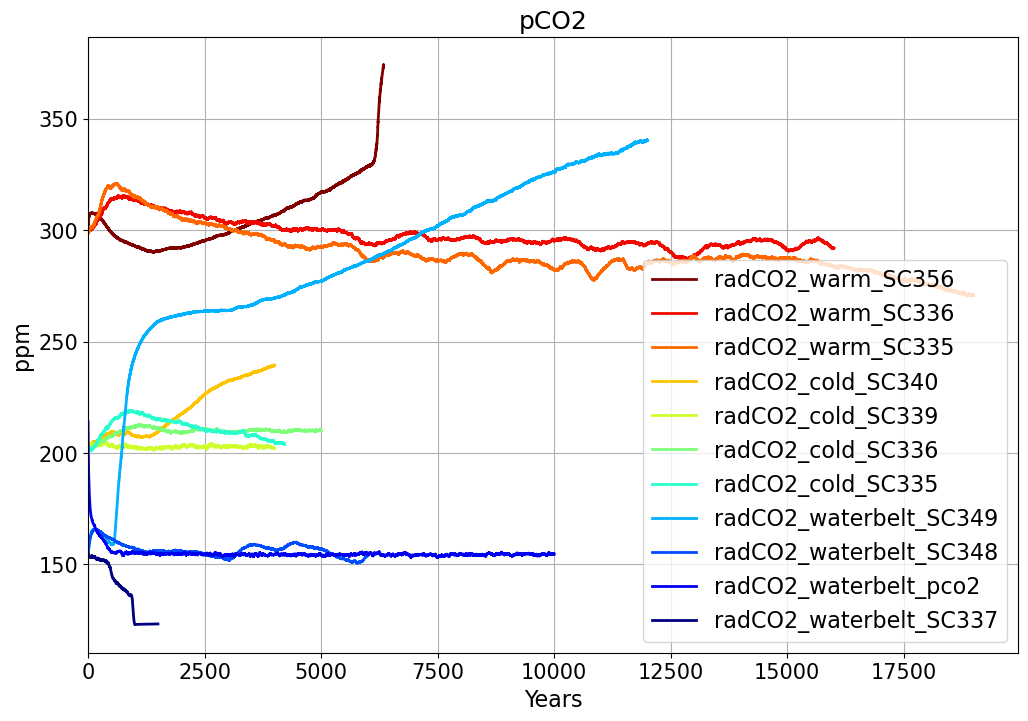

In [470]:
run_list = forc_list

fig, ax1 = plt.subplots(figsize=(12,8))       

colors = plt.cm.jet(np.linspace(1,0,len(run_list)))
for i in range(len(run_list)):
    years = np.arange(pCO2[run_list[i]].size)/12
    ax1.plot(years, pCO2[run_list[i]], linewidth=2, label=run_list[i], color=colors[i])
ax1.grid()
ax1.legend(loc='best', fontsize=16)
ax1.set_ylabel('ppm', fontsize=16)
ax1.set_xlabel('Years', fontsize=16)
ax1.set_title('pCO2', fontsize=18)
ax1.set_xlim(left=0)
ax1.tick_params(axis='both', which='major', labelsize=15)

# os.chdir('/nfs/home11/grad/2017/fz172169/0notebook')
# plt.savefig('pCO2_forcing.pdf')

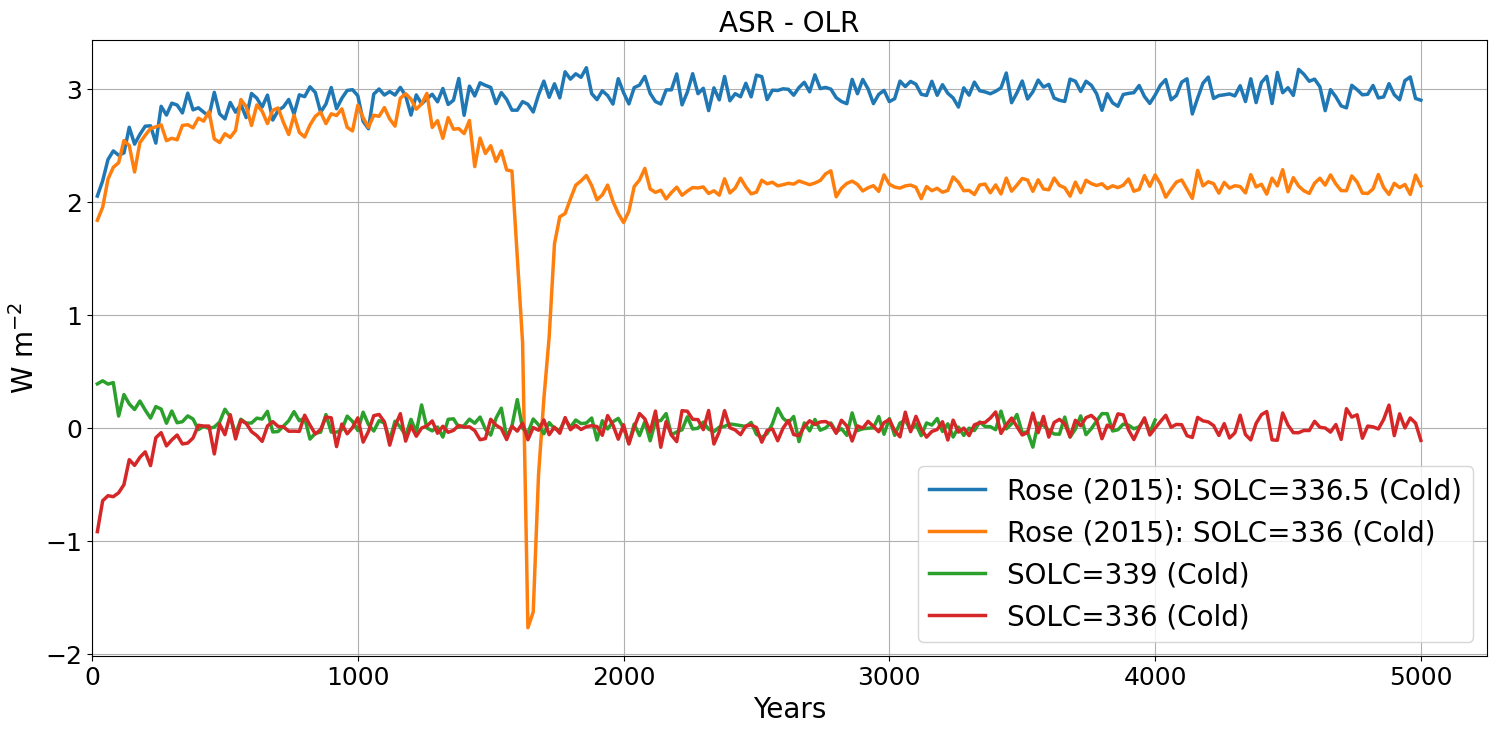

In [416]:
old_runs = ['SOLC336.5',
            'SOLC336',
           ]
new_runs = ['radCO2_cold_SC339',
            'radCO2_cold_SC336',
           ]
old_label = ['SOLC=336.5',
             'SOLC=336',
            ]
new_label = ['SOLC=339',
             'SOLC=336',
            ]

fig, ax1 = plt.subplots(figsize=(18,8))


state = 'cold'
rundir_old = '/nfs/data/rose_scr/br546577/ridge_'+state+'_SOLC'
outdir_old = '/nfs/roselab_rit/mitgcm_output/global_ridge'

for old_run in old_runs:
#     periods = str(len(glob(os.path.join(rundir_old, old_run) + '/out/Cpl*')))
    with open(os.path.join(outdir_old, state+'_'+old_run, 'TSR.Cpl250.data'),"rb") as f:
        TSR[old_run] = np.fromfile(f)
    with open(os.path.join(outdir_old, state+'_'+old_run, 'OLR.Cpl250.data'),"rb") as f:
        OLR[old_run] = np.fromfile(f)


for i in range(len(old_runs)):
    years_old = np.arange(1, TSR[old_runs[i]].size+1) * 20.
    ax1.plot(years_old, TSR[old_runs[i]]-OLR[old_runs[i]], 
             label='Rose (2015): '+old_label[i]+' (Cold)', linewidth=2.5)
for i in range(len(new_runs)):
    years_new = np.arange(1, TSR[new_runs[i]].size+1) * 20.
    ax1.plot(years_new, TSR[new_runs[i]]-OLR[new_runs[i]], 
             label=new_label[i]+' (Cold)', linewidth=2.5)

ax1.grid()
ax1.legend(loc='best', fontsize=20)
ax1.set_ylabel('W m$^{-2}$', fontsize=20)
ax1.set_xlabel('Years', fontsize=20)
ax1.set_title('ASR - OLR', fontsize=20)
ax1.set_xlim(left=0)
ax1.tick_params(axis='both', which='major', labelsize=18)

# os.chdir('/nfs/home11/grad/2017/fz172169/0notebook')
# plt.savefig('TOA_imbalance.pdf')

radCO2_warm_pco2
dASR/dTS =  -1.0998080835666935
dOLR/dTS =  1.0693498533012222
dR/dTS =  -0.03045823026547123
radCO2_warm_fix
dASR/dTS =  -1.1159616331233126
dOLR/dTS =  -0.09211565017919773
dR/dTS =  -1.2080772833025104
radCO2_warm_fixCO2
dASR/dTS =  -0.8919466484503813
dOLR/dTS =  -0.21184830831992202
dR/dTS =  -1.1037949567703034


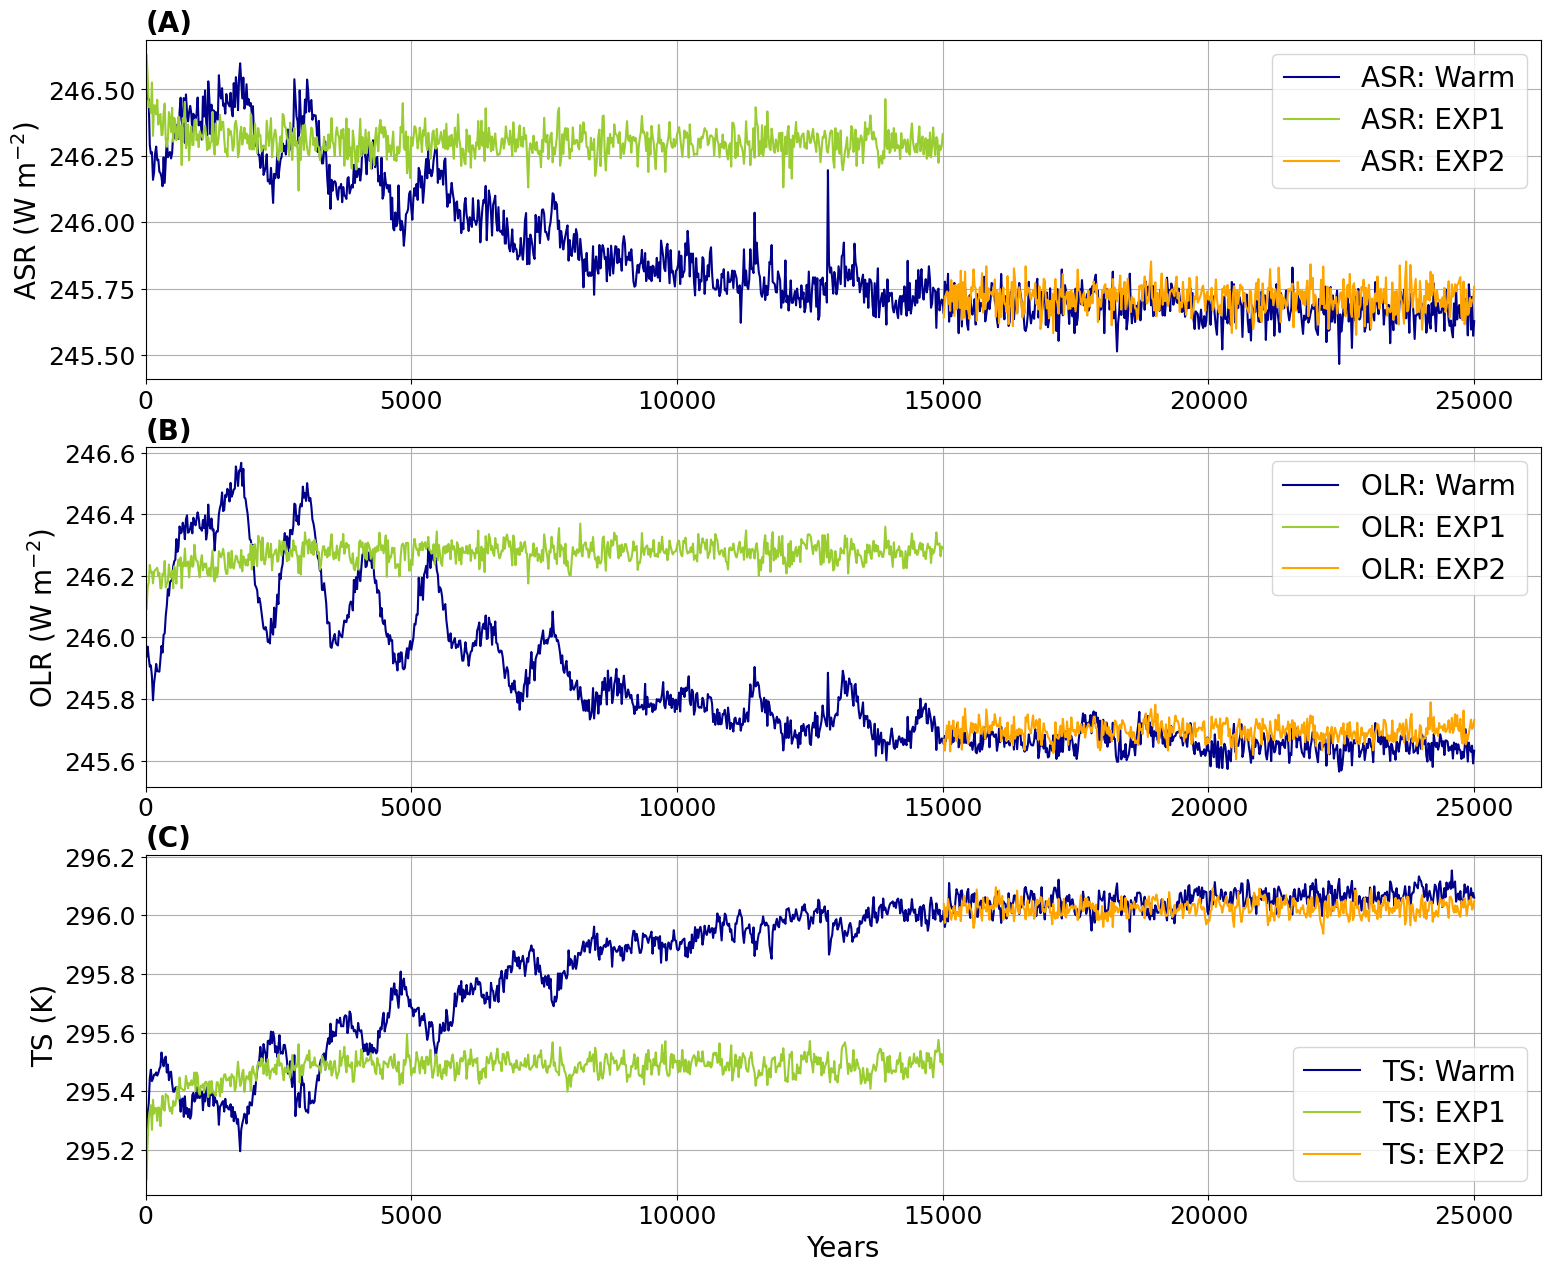

In [420]:
run_list = ['radCO2_warm_pco2' ,
#             'radCO2_warm_passive',
            'radCO2_warm_fix',       # fix CO2 in year 15,000
            'radCO2_warm_fixCO2',    # fix CO2 in year 0
           ]


# Linear regression
start = {}
end = {}
start['radCO2_warm_pco2'] = 125
end['radCO2_warm_pco2'] = 750
start['radCO2_warm_fixCO2'] = 125
end['radCO2_warm_fixCO2'] = len(TS['radCO2_warm_fixCO2'])
start['radCO2_warm_fix'] = 1
end['radCO2_warm_fix'] = len(TS['radCO2_warm_fix'])

for run in run_list:
    
    TSR_slope = stats.linregress(TS[run][start[run]:end[run]], TSR[run][start[run]:end[run]])[0]
    OLR_slope = stats.linregress(TS[run][start[run]:end[run]], OLR[run][start[run]:end[run]])[0]
    print(run)
    print('dASR/dTS = ', TSR_slope)
    print('dOLR/dTS = ', -OLR_slope)
    print('dR/dTS = ', TSR_slope - OLR_slope)


fig, ax = plt.subplots( 3, 1, figsize=(18,15))

colors = ['darkblue','yellowgreen','orange']

years = np.arange(1, TSR['radCO2_warm_pco2'].size+1) * 20.
ax[0].plot(years,TSR['radCO2_warm_pco2'], color=colors[0], label='ASR: Warm')
ax[0].plot(years[:len(TSR['radCO2_warm_fixCO2'])],TSR['radCO2_warm_fixCO2'], color=colors[1], label='ASR: EXP1')
ax[0].plot(years[750:750+len(TSR['radCO2_warm_fix'])],TSR['radCO2_warm_fix'], color=colors[2], label='ASR: EXP2')
ax[0].legend(loc='best', fontsize=20)
ax[0].set_title('(A)', loc='left', fontsize=20, fontweight='bold')
ax[0].set_ylabel('ASR (W m$^{-2}$)', fontsize=20)
ax[0].grid()
ax[0].set_xlim(left=0)
ax[0].tick_params(axis='both', which='major', labelsize=18)

ax[1].plot(years,OLR['radCO2_warm_pco2'], color=colors[0], label='OLR: Warm')
ax[1].plot(years[:len(TSR['radCO2_warm_fixCO2'])],OLR['radCO2_warm_fixCO2'], color=colors[1], label='OLR: EXP1')
ax[1].plot(years[750:750+len(TSR['radCO2_warm_fix'])],OLR['radCO2_warm_fix'], color=colors[2], label='OLR: EXP2')
ax[1].legend(loc='best', fontsize=20)
ax[1].set_title('(B)', loc='left', fontsize=20, fontweight='bold')
ax[1].set_ylabel('OLR (W m$^{-2}$)', fontsize=20)
ax[1].grid()
ax[1].set_xlim(left=0)
ax[1].tick_params(axis='both', which='major', labelsize=18)

ax[2].plot(years,TS['radCO2_warm_pco2'], color=colors[0], label='TS: Warm')
ax[2].plot(years[:len(TSR['radCO2_warm_fixCO2'])],TS['radCO2_warm_fixCO2'], color=colors[1], label='TS: EXP1')
ax[2].plot(years[750:750+len(TSR['radCO2_warm_fix'])],TS['radCO2_warm_fix'], color=colors[2], label='TS: EXP2')
ax[2].legend(loc='best', fontsize=20)
ax[2].set_title('(C)', loc='left', fontsize=20, fontweight='bold')
ax[2].set_ylabel('TS (K)', fontsize=20)
ax[2].set_xlabel('Years', fontsize=20)
ax[2].grid()
ax[2].set_xlim(left=0)
ax[2].tick_params(axis='both', which='major', labelsize=18)

# os.chdir('/nfs/home11/grad/2017/fz172169/0notebook')
# plt.savefig('carbon_feedback_Warm.pdf')

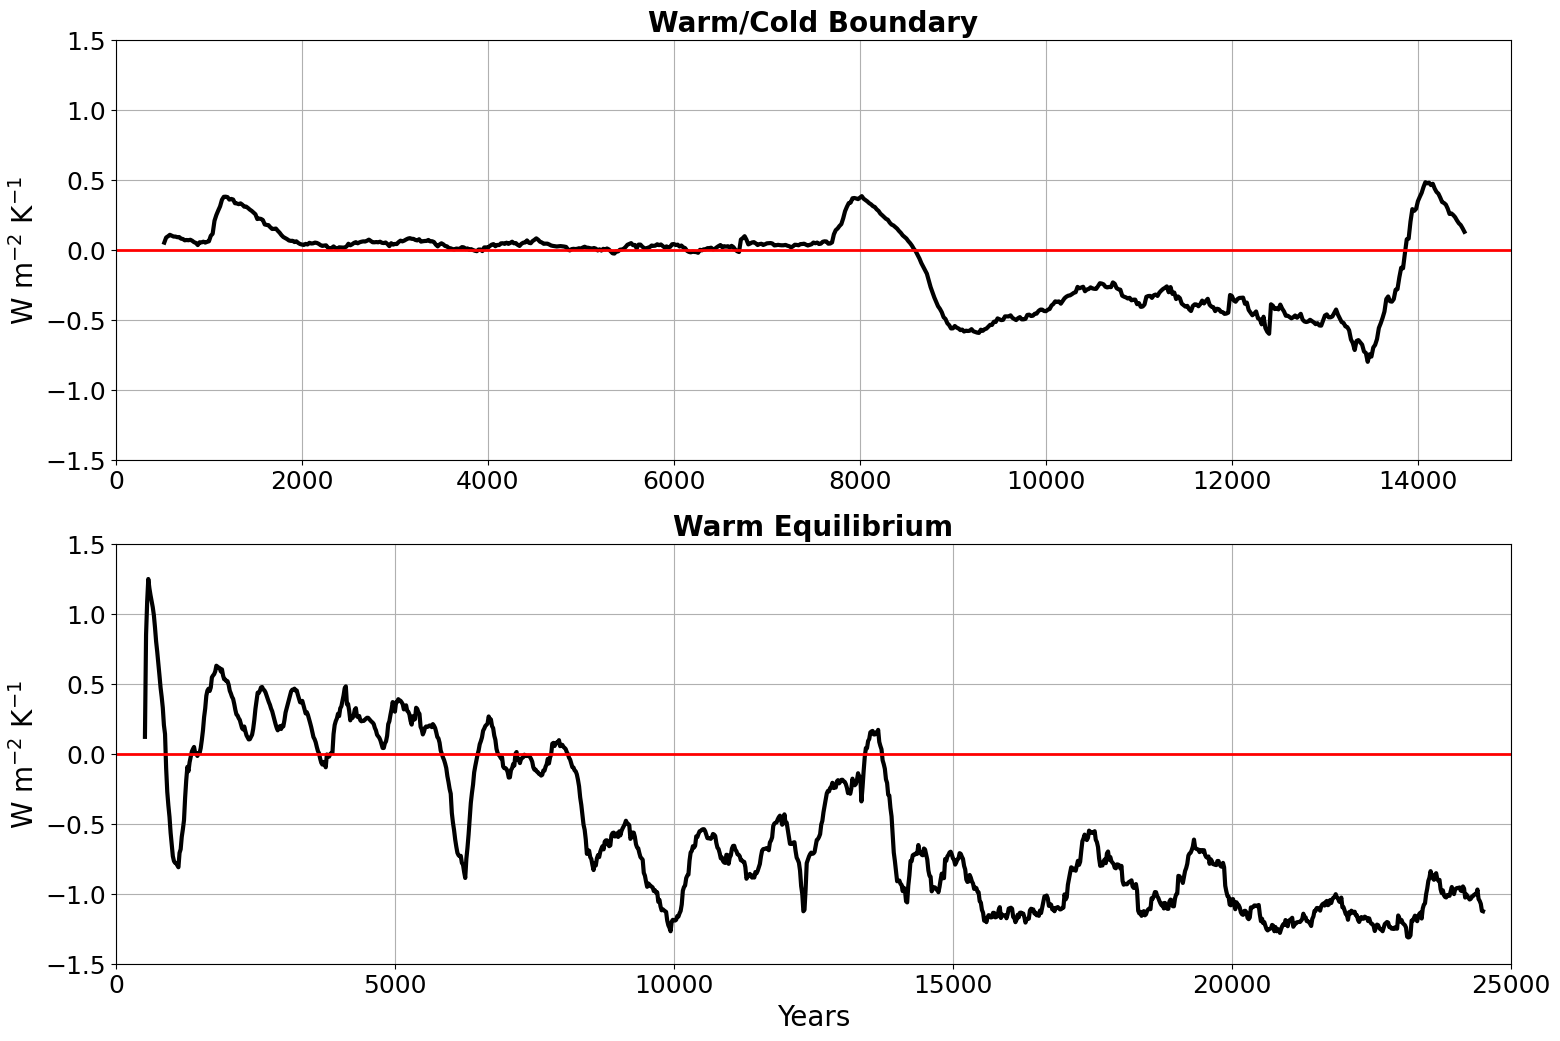

In [425]:
run_list = ['radCO2_cold_T293' ,
            'radCO2_warm_pco2',
           ]
title = ['Warm/Cold Boundary',
         'Warm Equilibrium',
        ]

start = {}
end = {}

fig, ax = plt.subplots( len(run_list), 1, figsize=(18,6*len(run_list)))

for i in range(len(run_list)):
    run = run_list[i]
    net_slope = []
    step = 50
    for n in range(len(TS[run])-step):
        start[run] = n
        end[run] = start[run]+step
        TSR_slope = stats.linregress(TS[run][start[run]:end[run]], TSR[run][start[run]:end[run]])[0]
        OLR_slope = stats.linregress(TS[run][start[run]:end[run]], OLR[run][start[run]:end[run]])[0]
        net_slope.append(TSR_slope - OLR_slope)
        

    years = np.arange(int(1+step/2), int(TSR[run].size-step/2+1)) * 20.
    ax[i].plot(years, net_slope, linewidth=3, color='k')
    ax[i].set_xlim(0,len(TS[run])*20)
    ax[i].set_ylim(-1.5,1.5)
    ax[i].set_ylabel('W m$^{-2}$ K$^{-1}$', fontsize=20)
    ax[i].set_title(title[i], fontsize=20, fontweight='bold')
    ax[i].axhline(y=0., color='red', linewidth=2)
    ax[i].tick_params(axis='both', which='major', labelsize=18)
    ax[i].grid()
ax[1].set_xlabel('Years', fontsize=20);

# os.chdir('/nfs/home11/grad/2017/fz172169/0notebook')
# plt.savefig('slope_Warm.pdf')

## Bifurcation diagram

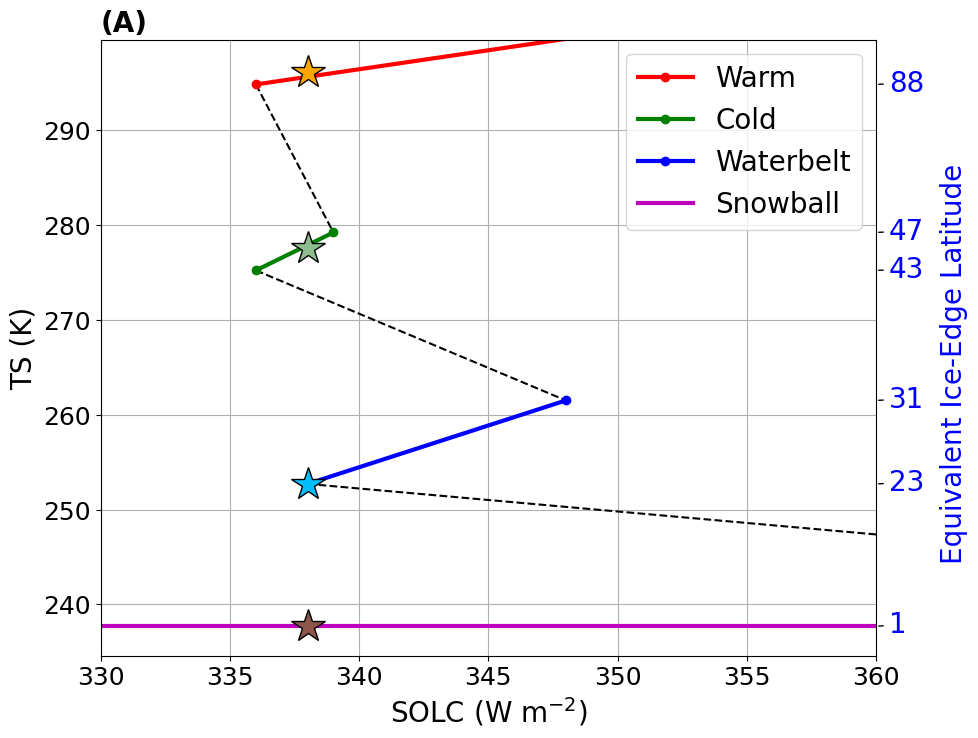

In [426]:
fig, ax = plt.subplots(figsize=(10,8))
x_warm, y_warm = [336,349], [294.8,300]
x_cold, y_cold = [336,339], [275.2,279.2]
x_waterbelt, y_waterbelt = [338,348], [252.7,261.5]
x_snowball, y_snowball = [334,357], [237.7,237.7]

ax.plot([x_warm[0],x_cold[1]], [y_warm[0],y_cold[1]], linestyle='dashed', color='k')
ax.plot([x_cold[0],x_waterbelt[1]], [y_cold[0],y_waterbelt[1]], linestyle='dashed', color='k')
ax.plot([x_waterbelt[0],400], [y_waterbelt[0],y_snowball[1]], linestyle='dashed', color='k')
ax.plot(x_warm, y_warm, marker='o', label='Warm', linewidth=3, color='r')
ax.plot(x_cold, y_cold, marker='o', label='Cold', linewidth=3, color='g')
ax.plot(x_waterbelt, y_waterbelt, marker='o', label='Waterbelt', linewidth=3, color='b')
ax.axline([x_snowball[0], y_snowball[0]], [x_snowball[1], y_snowball[1]], 
          label='Snowball', linewidth=3, color='m')

warm_T = 296.1
cold_T = 277.6
waterbelt_T = 252.7
snowball_T = 237.7
mk='*'
mksize=25
mkedgewidth=1
c='w'

ax.plot(338, warm_T, marker=mk, markersize=mksize, markeredgewidth=mkedgewidth, color='orange', 
        markeredgecolor='k')
ax.plot(338, cold_T, marker=mk, markersize=mksize, markeredgewidth=mkedgewidth, color='darkseagreen', 
        markeredgecolor='k')
ax.plot(338, waterbelt_T, marker=mk, markersize=mksize, markeredgewidth=mkedgewidth, color='deepskyblue', 
        markeredgecolor='k')
ax.plot(338, snowball_T, marker=mk, markersize=mksize, markeredgewidth=mkedgewidth, color='tab:brown', 
        markeredgecolor='k')


# y_warm_ice = [88.1,90.0]
# y_cold_ice = [42.7,46.7]
# y_waterbelt_ice = [22.6,30.8]
# y_snowball_ice = [0.9,0.9]

y_warm_ice = [88,90]
y_cold_ice = [43,47]
y_waterbelt_ice = [23,31]
y_snowball_ice = [1,1]

ax.annotate(str(y_warm_ice[1]), xy=(360,y_warm[1]), xytext=(360.5,y_warm[1]-0.7), 
            arrowprops=dict(facecolor='b',arrowstyle='-'), fontsize=20, color='b')
ax.annotate(str(y_warm_ice[0]), xy=(360,y_warm[0]), xytext=(360.5,y_warm[0]-0.7), 
            arrowprops=dict(facecolor='b',arrowstyle='-'), fontsize=20, color='b')
ax.annotate(str(y_cold_ice[1]), xy=(360,y_cold[1]), xytext=(360.5,y_cold[1]-0.7), 
            arrowprops=dict(facecolor='b',arrowstyle='-'), fontsize=20, color='b')
ax.annotate(str(y_cold_ice[0]), xy=(360,y_cold[0]), xytext=(360.5,y_cold[0]-0.7), 
            arrowprops=dict(facecolor='b',arrowstyle='-'), fontsize=20, color='b')
ax.annotate(str(y_waterbelt_ice[1]), xy=(360,y_waterbelt[1]), xytext=(360.5,y_waterbelt[1]-0.7), 
            arrowprops=dict(facecolor='b',arrowstyle='-'), fontsize=20, color='b')
ax.annotate(str(y_waterbelt_ice[0]), xy=(360,y_waterbelt[0]), xytext=(360.5,y_waterbelt[0]-0.7), 
            arrowprops=dict(facecolor='b',arrowstyle='-'), fontsize=20, color='b')
ax.annotate(str(y_snowball_ice[0]), xy=(360,y_snowball[0]), xytext=(360.5,y_snowball[0]-0.7), 
            arrowprops=dict(facecolor='b',arrowstyle='-'), fontsize=20, color='b')
ax.text(362.5, 245, 'Equivalent Ice-Edge Latitude', rotation='vertical', fontsize=20, color='b')

ax.grid()
ax.legend(loc='best', fontsize=20)
ax.set_title('(A)', loc='left', fontsize=20, fontweight='bold')
ax.set_ylabel('TS (K)', fontsize=20)
ax.set_xlabel('SOLC (W m$^{-2}$)', fontsize=20)
ax.set_xlim((330,360))
ax.set_ylim(top=299.5)
ax.tick_params(axis='both', which='major', labelsize=18)

# os.chdir('/nfs/home11/grad/2017/fz172169/0notebook')
# plt.savefig('bifurcation.pdf')

## 3-D SST and ice fraction

In [478]:
ice_fract = {}
sst = {}
for run in exp_equilibria:
    periods = str(len(glob(os.path.join(rundir, run) + '/out/Cpl*')))

    # Ice fraction
    DiagICE = mit.rdmnc(os.path.join(rundir, run, 'out', 'Cpl'+periods, 'Atm/DiagIce.*'))
    ice_fract[run] = np.mean(np.squeeze(DiagICE['SI_Fract']),axis = 0)
    # SST
    DiagOcnTave = mit.rdmnc(os.path.join(rundir, run, 'out', 'Cpl'+periods, 'Ocn/DiagOcnTave.*'))
    sst[run] = np.mean(np.squeeze(DiagOcnTave['THETA'][:,0,:,:]),axis = 0)

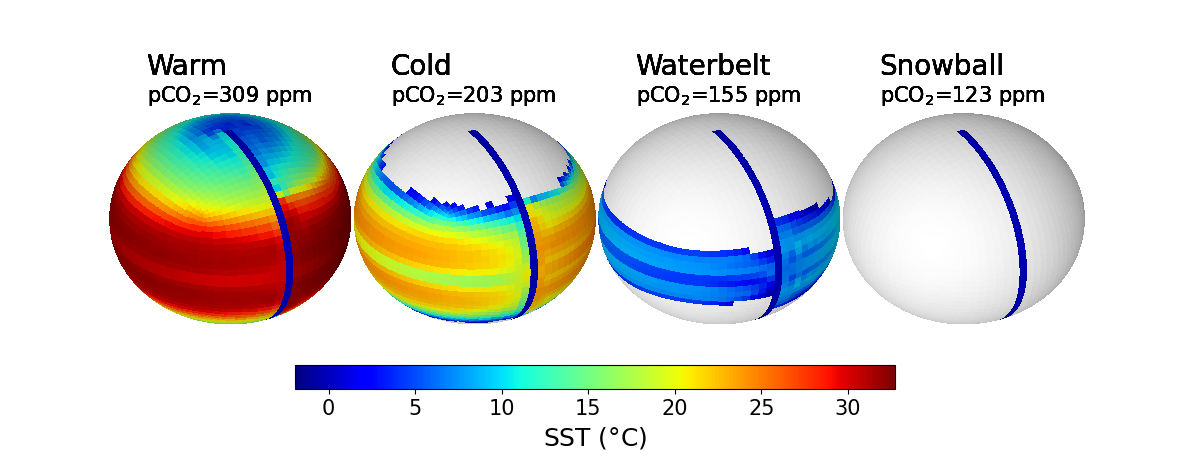

In [515]:
from mpl_toolkits.mplot3d import Axes3D

width = 0.43
aspect = (8-width*6) / 8.
ratio = 1./4./aspect

fig = plt.figure(figsize=(15,6))
#fig = plt.figure(figsize=plt.figaspect(ratio))
bg_color = 'white'

title = ['Warm', 'Cold', 'Waterbelt', 'Snowball']
pCO2 = ['309', '203', '155', '123']

sst_mask = {}
total_fields = []
for run in exp_equilibria:
    sst_mask[run] = np.ma.masked_where(ice_fract[run] > 0.15, sst[run])
    total_fields = np.append(total_fields, sst_mask[run]) 

#axs = []
for i in range(len(exp_equilibria)):
    run = exp_equilibria[i]
    ax = fig.add_subplot(1,4,i+1)
    p = pcol(XG, YG, sst_mask[run], total_fields, title=title[i], pCO2=pCO2[i], projection='sphere')
#    axs.append(ax)


plt.subplots_adjust(wspace=-width, hspace=0)
m = cm.ScalarMappable(cmap=cm.jet)
m.set_array(total_fields)

cax = fig.add_axes([0.315, 0.22, 0.4, 0.04])
cbar = fig.colorbar(m, cax=cax, orientation='horizontal')
#cb = fig.colorbar(m, ax=axs, location='bottom', shrink=0.75, aspect=50)
cbar.set_label('SST ($\degree$C)', fontsize=18)
#cb.outline.set_edgecolor(bg_color)
cbar.ax.tick_params(labelsize=15)

# os.chdir('/nfs/home11/grad/2017/fz172169/0notebook')
# plt.savefig('3DSST.pdf', facecolor=bg_color)

## Total carbon inventory

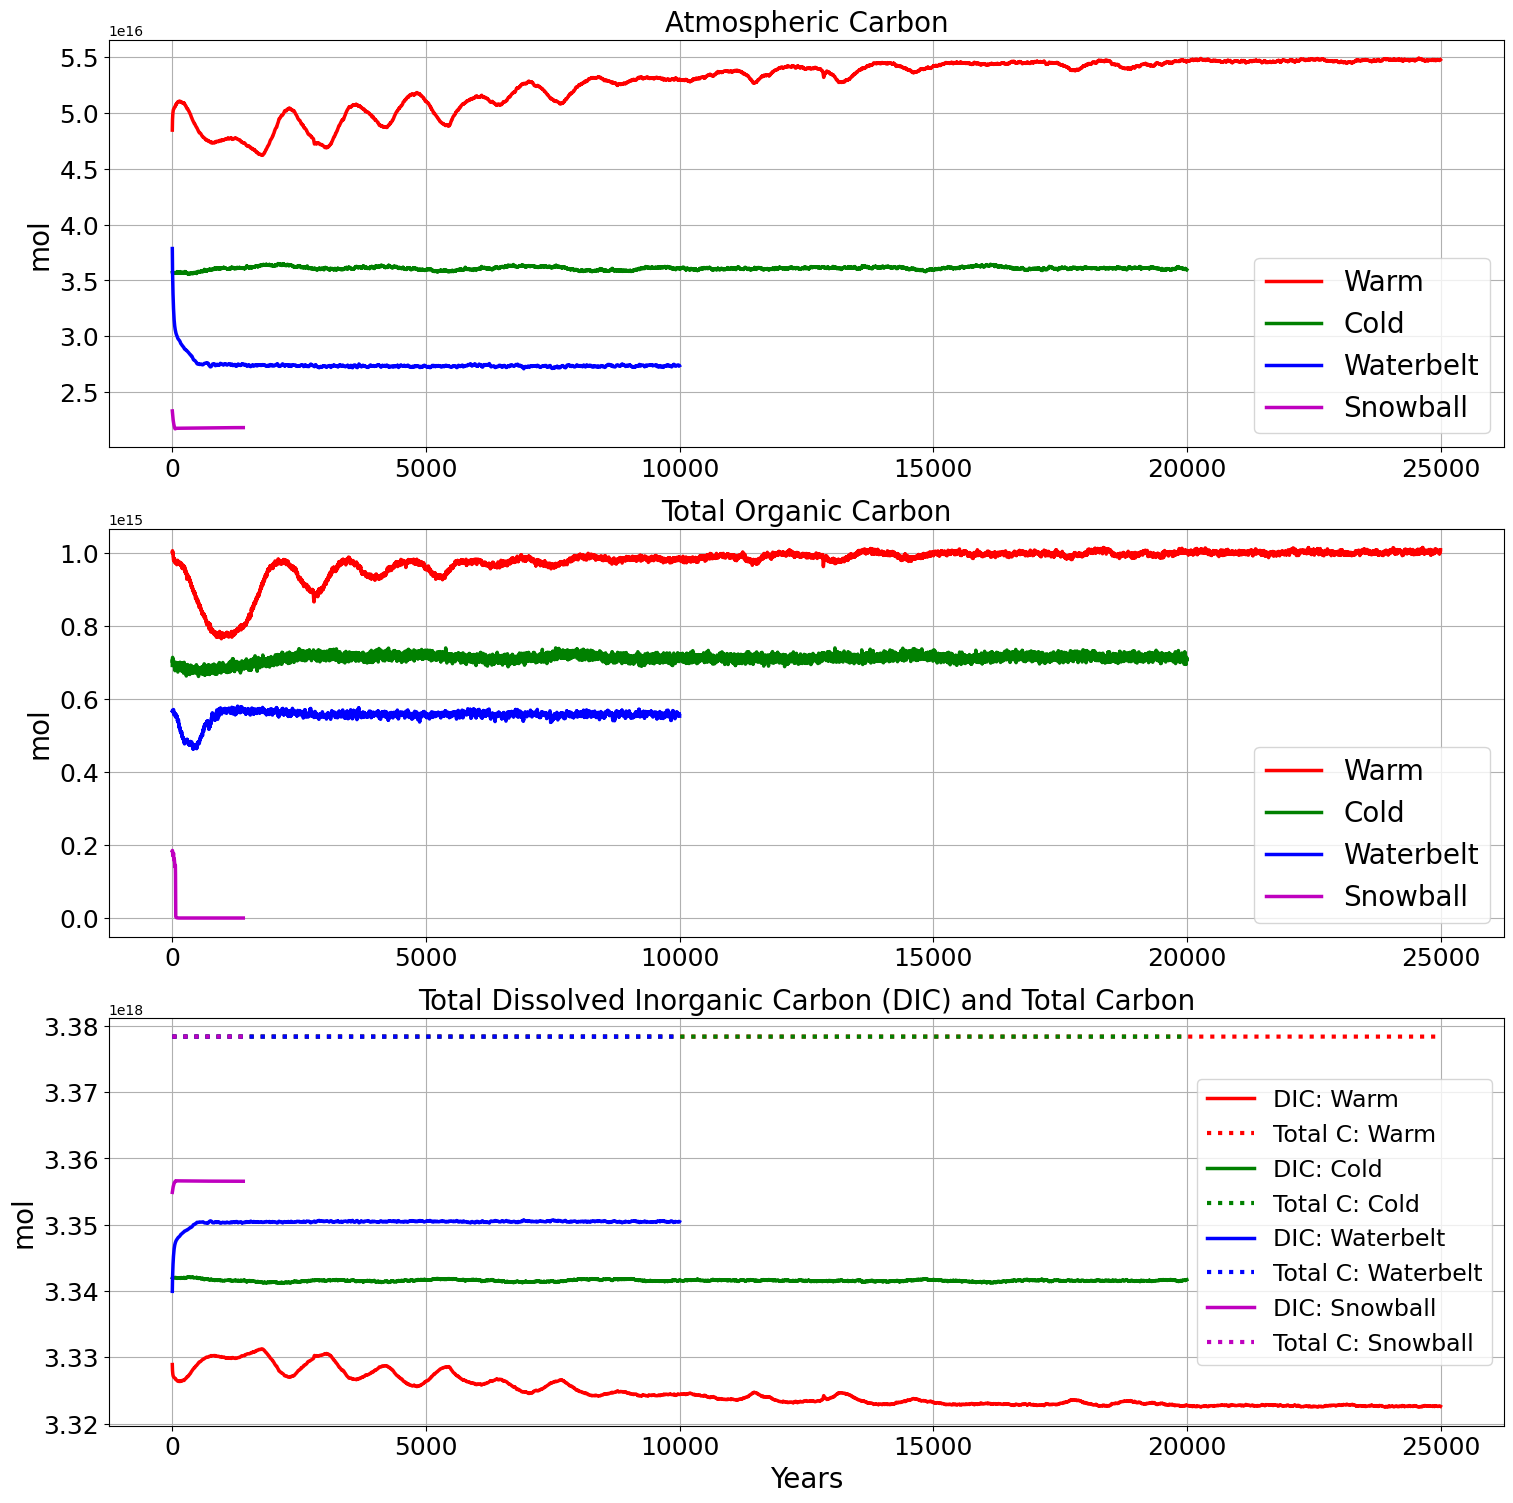

In [492]:
vol = {}
DIC = {}
DOP = {}
total_DIC = {}
atm_carbon = {}
bio_carbon = {}
ocn_carbon = {}
total_carbon = {}

run_list = exp_equilibria

f_Bio = 'BioStDiag.*'
flen_Bio = 20
var_Bio = ['TRAC01_vol','TRAC01_ave','TRAC04_ave']

fig, axes = plt.subplots(3,1, figsize=(18,18))

labels = ['Warm','Cold','Waterbelt','Snowball']
colors = ['r','g','b','m']
linewidth = 2.5

for run in run_list:
    periods = str(len(glob(os.path.join(rundir, run) + '/out/Cpl*')))  
    try:  
        with open(os.path.join(outdir, run, 'OcnVol.Cpl' + periods + '.data'),"rb") as f:
            vol[run] = np.fromfile(f)
        with open(os.path.join(outdir, run, 'DIC.Cpl' + periods + '.data'),"rb") as f:
            DIC[run] = np.fromfile(f)
        with open(os.path.join(outdir, run, 'DOP.Cpl' + periods + '.data'),"rb") as f:
            DOP[run] = np.fromfile(f)
    except:       
        print('Get the ocean carbon from ', run)
        ocn_vars = StDiag(os.path.join(rundir,run), fname=f_Bio, outlength=flen_Bio, var=var_Bio)
        print('Shape of the ocean carbon variable is ', ocn_vars[var_Bio[0]].shape)
        try:
            os.mkdir(os.path.join(outdir,run))
        except:
            pass
#             try:
#                 for f in glob(os.path.join(outdir,run,'OcnVol.Cpl*')):
#                     os.remove(f)
#                 for f in glob(os.path.join(outdir,run,'DIC.Cpl*')):
#                     os.remove(f)
#                 for f in glob(os.path.join(outdir,run,'DOP.Cpl*')):
#                     os.remove(f)
#             except:
#                 pass
        with open(os.path.join(outdir, run, 'OcnVol.Cpl' + periods + '.data'),"wb") as f:
            f.write(ocn_vars['TRAC01_vol'])
        with open(os.path.join(outdir, run, 'DIC.Cpl' + periods + '.data'),"wb") as f:
            f.write(ocn_vars['TRAC01_ave'])
        with open(os.path.join(outdir, run, 'DOP.Cpl' + periods + '.data'),"wb") as f:
            f.write(ocn_vars['TRAC04_ave'])
        vol[run] = ocn_vars['TRAC01_vol']
        DIC[run] = ocn_vars['TRAC01_ave']
        DOP[run] = ocn_vars['TRAC04_ave']

    total_DIC[run] = vol[run] * DIC[run]     
    atm_carbon[run] = pCO2_ann[run] * 1E-6 * total_atmos_moles    
    bio_carbon[run] = vol[run] * R_CP * DOP[run]    
    ocn_carbon[run] = total_DIC[run] + bio_carbon[run]    
    total_carbon[run] = total_DIC[run] + atm_carbon[run] + bio_carbon[run]
    
    years = np.arange(total_carbon[run].size)
    
    if run == exp_warm[0]:
        axes[0].plot(years, atm_carbon[run], color=colors[0], linewidth=linewidth, label=labels[0])
        axes[1].plot(years, bio_carbon[run], color=colors[0], linewidth=linewidth, label=labels[0])
        axes[2].plot(years, total_DIC[run], color=colors[0], linewidth=linewidth, 
                     label='DIC: '+labels[0])
        axes[2].plot(years, total_carbon[run], color=colors[0], linewidth=3, linestyle='dotted',
                     label='Total C: '+labels[0])
    elif run == exp_cold[0]:
        axes[0].plot(years, atm_carbon[run], color=colors[1], linewidth=linewidth, label=labels[1])
        axes[1].plot(years, bio_carbon[run], color=colors[1], linewidth=linewidth, label=labels[1])
        axes[2].plot(years, total_DIC[run], color=colors[1], linewidth=linewidth, 
                     label='DIC: '+labels[1])
        axes[2].plot(years, total_carbon[run], color=colors[1], linewidth=3, linestyle='dotted',
                     label='Total C: '+labels[1])
    elif run == exp_waterbelt[0]:
        axes[0].plot(years, atm_carbon[run], color=colors[2], linewidth=linewidth, label=labels[2])
        axes[1].plot(years, bio_carbon[run], color=colors[2], linewidth=linewidth, label=labels[2])
        axes[2].plot(years, total_DIC[run], color=colors[2], linewidth=linewidth, 
                     label='DIC: '+labels[2])
        axes[2].plot(years, total_carbon[run], color=colors[2], linewidth=3, linestyle='dotted',
                     label='Total C: '+labels[2])
    else:
        axes[0].plot(years, atm_carbon[run], color=colors[3], linewidth=linewidth, label=labels[3])
        axes[1].plot(years, bio_carbon[run], color=colors[3], linewidth=linewidth, label=labels[3])
        axes[2].plot(years, total_DIC[run], color=colors[3], linewidth=linewidth, 
                     label='DIC: '+labels[3])
        axes[2].plot(years, total_carbon[run], color=colors[3], linewidth=3, linestyle='dotted',
                     label='Total C: '+labels[3])

axes[0].set_title('Atmospheric Carbon', fontsize=20)
axes[1].set_title('Total Organic Carbon', fontsize=20)
axes[2].set_title('Total Dissolved Inorganic Carbon (DIC) and Total Carbon', fontsize=20)
#axes[3].set_title('Total Carbon', fontsize=18)
axes[0].set_ylabel('mol', fontsize=20)
axes[1].set_ylabel('mol', fontsize=20)
axes[2].set_ylabel('mol', fontsize=20)
axes[2].set_xlabel('Years', fontsize=20)
#axes[3].set_ylabel('mol', fontsize=18)
#axes[3].set_xlabel('Years', fontsize=18)
axes[0].legend(loc='best', fontsize=20)
axes[1].legend(loc='best', fontsize=20)
axes[2].legend(loc='best', fontsize=17)
#axes[3].legend(loc='upper right', fontsize=16)

for ax in axes:
    ax.grid()
    ax.tick_params(axis='both', which='major', labelsize=18)

# os.chdir('/nfs/home11/grad/2017/fz172169/0notebook')
# plt.savefig('carbon_equilibria.pdf')